# Preventing Hospitalizations with Machine Learning
by Lili Beit


Photo by <a href="https://unsplash.com/@naassomz1?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Naassom Azevedo</a> on <a href="https://unsplash.com/s/photos/happy-elderly-people?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
  
  Photo by <a href="https://unsplash.com/@impulsq?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Online Marketing</a> on <a href="https://unsplash.com/s/photos/medical?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
  
  Photo by <a href="https://unsplash.com/@hush52?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Hush Naidoo</a> on <a href="https://unsplash.com/s/photos/health?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
  Photo by <a href="https://unsplash.com/@dosejuice?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Dose Juice</a> on <a href="https://unsplash.com/s/photos/health?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
  Photo by <a href="https://unsplash.com/@swimstaralex?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Alexander Sinn</a> on <a href="https://unsplash.com/s/photos/machine-learning?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  
  Photo by <a href="https://unsplash.com/@markusspiske?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Markus Spiske</a> on <a href="https://unsplash.com/s/photos/machine-learning?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>
  

## Overview

Over the past two decades, the U.S. health care community has taken significant strides in the direction of [value-based care](https://catalyst.nejm.org/doi/full/10.1056/CAT.17.0558).  The federal government and private insurers have started to incentivize providers to deliver high-quality care at low cost, rather than on a fee-for-service basis.  Networks of providers and hospitals that coordinate care are able to improve health outcomes and reduce health care costs.  Under value-based payment systems such as [Medicare's Accountable Care Organization (ACO) program](https://innovation.cms.gov/innovation-models/aco), provider networks that reduce costs are entitled to a share of the savings to the insurer.

## Business Problem

One of the greatest benefits of coordinated care is a reduction in hospitalizations due to better management of chronic diseases. Successfully preventing adverse events helps patients stay healthy, reduces the costs to society of unexpected illness, and creates savings for insurers and ACOs.

Thus, a major goal for ACOs is to identify patients who are at high risk for hospitalization and target them for outreach. By keeping these patients out of the hospital, the ACO can realize its goal of reducing costs to the insurer and keep a share of the savings.

This project uses machine learning to predict which patients are likely to be hospitalized over the next twelve months.  Using the data in their electronic health records (EHR) and billing systems, ACOs can replicate this model to target patients for care management and reduce hospitalizations.

## Data Understanding

To test models for predicting hospitalizations, I used data from the [2017-2018 National Health and Nutrition Examination Survey (NHANES)](https://wwwn.cdc.gov/nchs/nhanes/continuousnhanes/default.aspx?BeginYear=2017).  This survey, which is sponsored by the Centers for Disease Control, examined a nationally representative sample of over 9,000 people located in counties across the U.S.  NHANES employs a rigorous process to gather demographic, health history, physical examination, and laboratory data from each participant.  For this project I used only a few of the hundreds of variables NHANES makes publicly available.

For the target, I used the variable showing whether participants had been hospitalized over the past 12 months.  However, I altered this variable to show no hospitalizations for patients whose only hospitalization was for childbirth.

As predictors, I used medical conditions that participants had prior to 12 months ago, as well as medications they had been taking for more than a year. I chose which variables to test based on [Agency for Healthcare Research and Quality (AHRQ) statistics](https://www.hcup-us.ahrq.gov/faststats/NationalDiagnosesServlet) showing the most common hospital diagnoses, as well as a recent [American Journal of Managed Care (AJMC) article](https://www.ajmc.com/view/predicting-hospitalizations-from-electronic-health-record-data) whose authors also developed a predictive model for hospitalizations.

Only 8.5% of NHANES participants were hospitalized, reflecting a large class imbalance between hospitalized and non-hospitalized patients, as shown below.


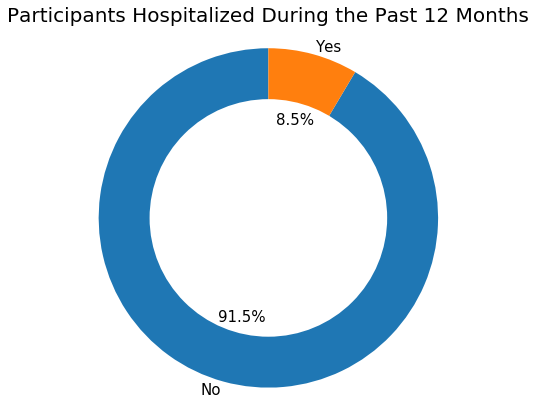

## Data Preparation

Most of the data manipulation for this project involved altering the medical conditions data to show only those conditions which patients had had for 12 months or more.  Since the target is hospitalizations within the past year, I only used medical conditions as predictors if patients were diagnosed with them prior to one year ago.  

The one exception to this rule was Chronic Obstructive Pulmonary Disease (COPD).  NHANES did not include a variable asking when the participant was diagnosed with COPD, unlike for the other medical conditions.  The only variable available asked if patients had ever had COPD.  Since COPD is an important predictor of hospitalizations, I included it in the model even though it is possible some patients were diagnosed within the past year.

In a handful of cases, participants did not know how old they were when diagnosed with particular conditions, and instead of an age value, there was a dummy value in the data.  I replaced all dummy values with the median value for that column, with the result that when participants did not know their age of diagnosis, I marked them as having the condition for more than 1 year.

One quirk of NHANES data is that all ages over 80 are top-coded at 80, including ages of diagnosis.  Thus, for patients 80 and older who were also diagnosed with conditions at 80 or above, it is impossible to tell whether they had these conditions for longer than 1 year.  I decided to include these conditions as predictors even though it is not possible to tell whether participants had them before they were hospitalized.

Finally, I excluded participants younger than 2 from this analysis, because the predictors I focused on were not available for these participants.

The data cleaning and feature engineering steps I followed can be found in [this notebook](https://github.com/lilisbeit/nhanes/blob/main/data-cleaning-and-feature_engineering.ipynb).

Before modeling, I set aside 10% of the data in a holdout set, and used it to evaluate the final model.

## Modeling

### Model Types and Metrics

I tested several model types including logistic regression, naive Bayes, random forest, and gradient-boosted tree.  I evaluated each model on its recall (sensitivity) score, while ensuring that the precision (specificity) score was not too low.  Since ACOs will need a list of specific patients to target, the goal of this project was to correctly identify as many hospitalized patients as possible, with a lesser focus on excluding patients who were not hospitalized.  Since reaching high-risk patients is the primary goal, and outreach will benefit all patients, it pays to have more false positives than false negatives.  I set a minimum threshold of 0.2 for precision, meaning that the ratio of false positive to true positives cannot exceed 4:1.  

I also calculated the Receiver Operating Curve (ROC-AUC) score for reference, because the [AJMC article](https://www.ajmc.com/view/predicting-hospitalizations-from-electronic-health-record-data) referenced above used this metric to evaluate models.  The study authors used EHR and billing data to predict which patients would be hospitalized over the next 6 months, and built a model with an ROC-AUC score of 0.846.

All scores were calculated by running five-fold cross-validation and taking the mean of each metric.

### Baseline Model

The baseline model is a logistic regression with a **recall score of 0.02, a precision score of 0.45, and a ROC-AUC score of 0.51**.  Although precision is high, recall is too low to be useful to an ACO.  They would have very few patients on their list to target for outreach.

### Final Model

The final model is a logistic regression with a **recall score of 0.69, a precision score of 0.21 and an ROC-AUC score of 0.74**, when tested on a hold-out set.  This model narrowly beat out a random forest model which had a higher recall of 0.70, but a lower precision of 0.18, below the threshold of 0.2.  The final model included the following features:

* circulatory conditions
* respiratory conditions
* diabetes
* arthritis
* liver conditions
* cancer
* age
* race
* total number of prescription drugs

In [1]:
# import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import utils as ut

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import cross_val_predict, GridSearchCV
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_colwidth', 1000)

### Feature Selection for Baseline Model

In the baseline model, I included some of the medical conditions most likely to lead to hospitalization, according to the [AHRQ](https://www.hcup-us.ahrq.gov/faststats/NationalDiagnosesServlet) and the [AJMC article](https://www.ajmc.com/view/predicting-hospitalizations-from-electronic-health-record-data):


* circulatory system (in particular heart failure)
* respiratory system (in particular COPD)
* diabetes
* osteoarthritis
* age

Since there are only 9,000 rows in my data, I chose to include around 10 variables as a first pass, since more may make the model's predictions ungeneralizable due to the curse of dimensionality.

Other medical conditions linked to hospitalizations include:
* liver conditions (included later)
* sickle cell anemia (not in NHANES data)
* osteoporosis / hip fractures (add in a future iteration of this project)
* alcohol-related disorders (add in a future iteration of this project)
* depressive disorders (add in a future iteration of this project)

In this model, the variables are continuous, showing how many years the participant has had each medical condition

In [2]:
# import df with continuous variables

yrs_df_3 = pd.read_csv('data/yrs_df').set_index('SEQN')
yrs_df_3


RIDAGEYR  yrs_osteoarth  yrs_other_arth  yrs_heart_fail  \
SEQN                                                                    
93703.00000    2.00000        0.00000         0.00000         0.00000   
93704.00000    2.00000        0.00000         0.00000         0.00000   
93705.00000   66.00000        0.00000         2.00000         0.00000   
93706.00000   18.00000        0.00000         0.00000         0.00000   
93707.00000   13.00000        0.00000         0.00000         0.00000   
...                ...            ...             ...             ...   
102952.00000  70.00000        0.00000         0.00000         0.00000   
102953.00000  42.00000        0.00000         0.00000         0.00000   
102954.00000  41.00000        0.00000         0.00000         0.00000   
102955.00000  14.00000        0.00000         0.00000         0.00000   
102956.00000  38.00000       11.00000         0.00000         0.00000   

              yrs_heart_cond  ever_had_COPD  yrs_emphysema  yrs_chron_bronc  \
SEQN                                                                          
93703.00000          0.00000        0.00000        0.00000          0.00000   
93704.00000          0.00000        0.00000        0.00000          0.00000   
93705.00000          0.00000        0.00000        0.00000          0.00000   
93706.00000          0.00000        0.00000        0.00000          0.00000   
93707.00000          0.00000        0.00000        0.00000          0.00000   
...                      ...            ...            ...              ...   
102952.00000         0.00000        0.00000        0.00000          0.00000   
102953.00000         0.00000        0.00000        0.00000          0.00000   
102954.00000         0.00000        0.00000        0.00000          0.00000   
102955.00000         0.00000        0.00000        0.00000          0.00000   
102956.00000         0.00000        0.00000        0.00000          0.00000   

              yrs_asthma  yrs_diabetes  yrs_taking_ins  HUQ071  
SEQN                                                            
93703.00000      0.00000       0.00000         0.00000 0.00000  
93704.00000      0.00000       0.00000         0.00000 0.00000  
93705.00000      0.00000       0.00000         0.00000 0.00000  
93706.00000      0.00000       0.00000         0.00000 0.00000  
93707.00000      0.00000       0.00000         0.00000 0.00000  
...                  ...           ...             ...     ...  
102952.00000     0.00000       0.00000         0.00000 0.00000  
102953.00000     0.00000       0.00000         0.00000 0.00000  
102954.00000     0.00000       0.00000         0.00000 0.00000  
102955.00000     0.00000       0.00000         0.00000 0.00000  
102956.00000     0.00000       0.00000         0.00000 0.00000  

[8894 rows x 12 columns]

In [3]:
# minority class is just 8.5 %

yrs_df_3['HUQ071'].value_counts(normalize=True)


0.00000   0.91455
1.00000   0.08545
Name: HUQ071, dtype: float64

In [4]:
# create df to plot doughnut chart

target_ratio = pd.DataFrame(yrs_df_3['HUQ071'].value_counts(normalize=True))
target_ratio.rename(index = {0.00000: 'No', 1.00000: 'Yes'}, inplace=True)
target_ratio


HUQ071
No  0.91455
Yes 0.08545

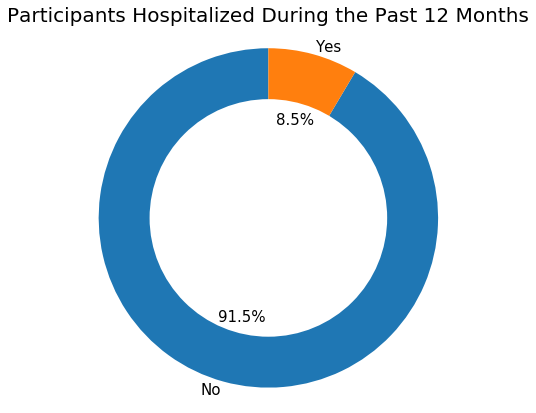

In [5]:
# plot doughnut chart to show target distribution
# minority class is very small

plt.rcParams['font.size'] = 15

fig1, ax1 = plt.subplots(figsize=(8,6))
ax1.pie(target_ratio['HUQ071'], 
        labels=target_ratio.index,
        autopct='%1.1f%%',
        labeldistance=1.05,
        startangle=90,
        textprops = {"fontsize":15})
ax1.set_title('Participants Hospitalized During the Past 12 Months', pad=10, fontsize=20)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig('images/label-distribution-pie-1', bbox_inches='tight')


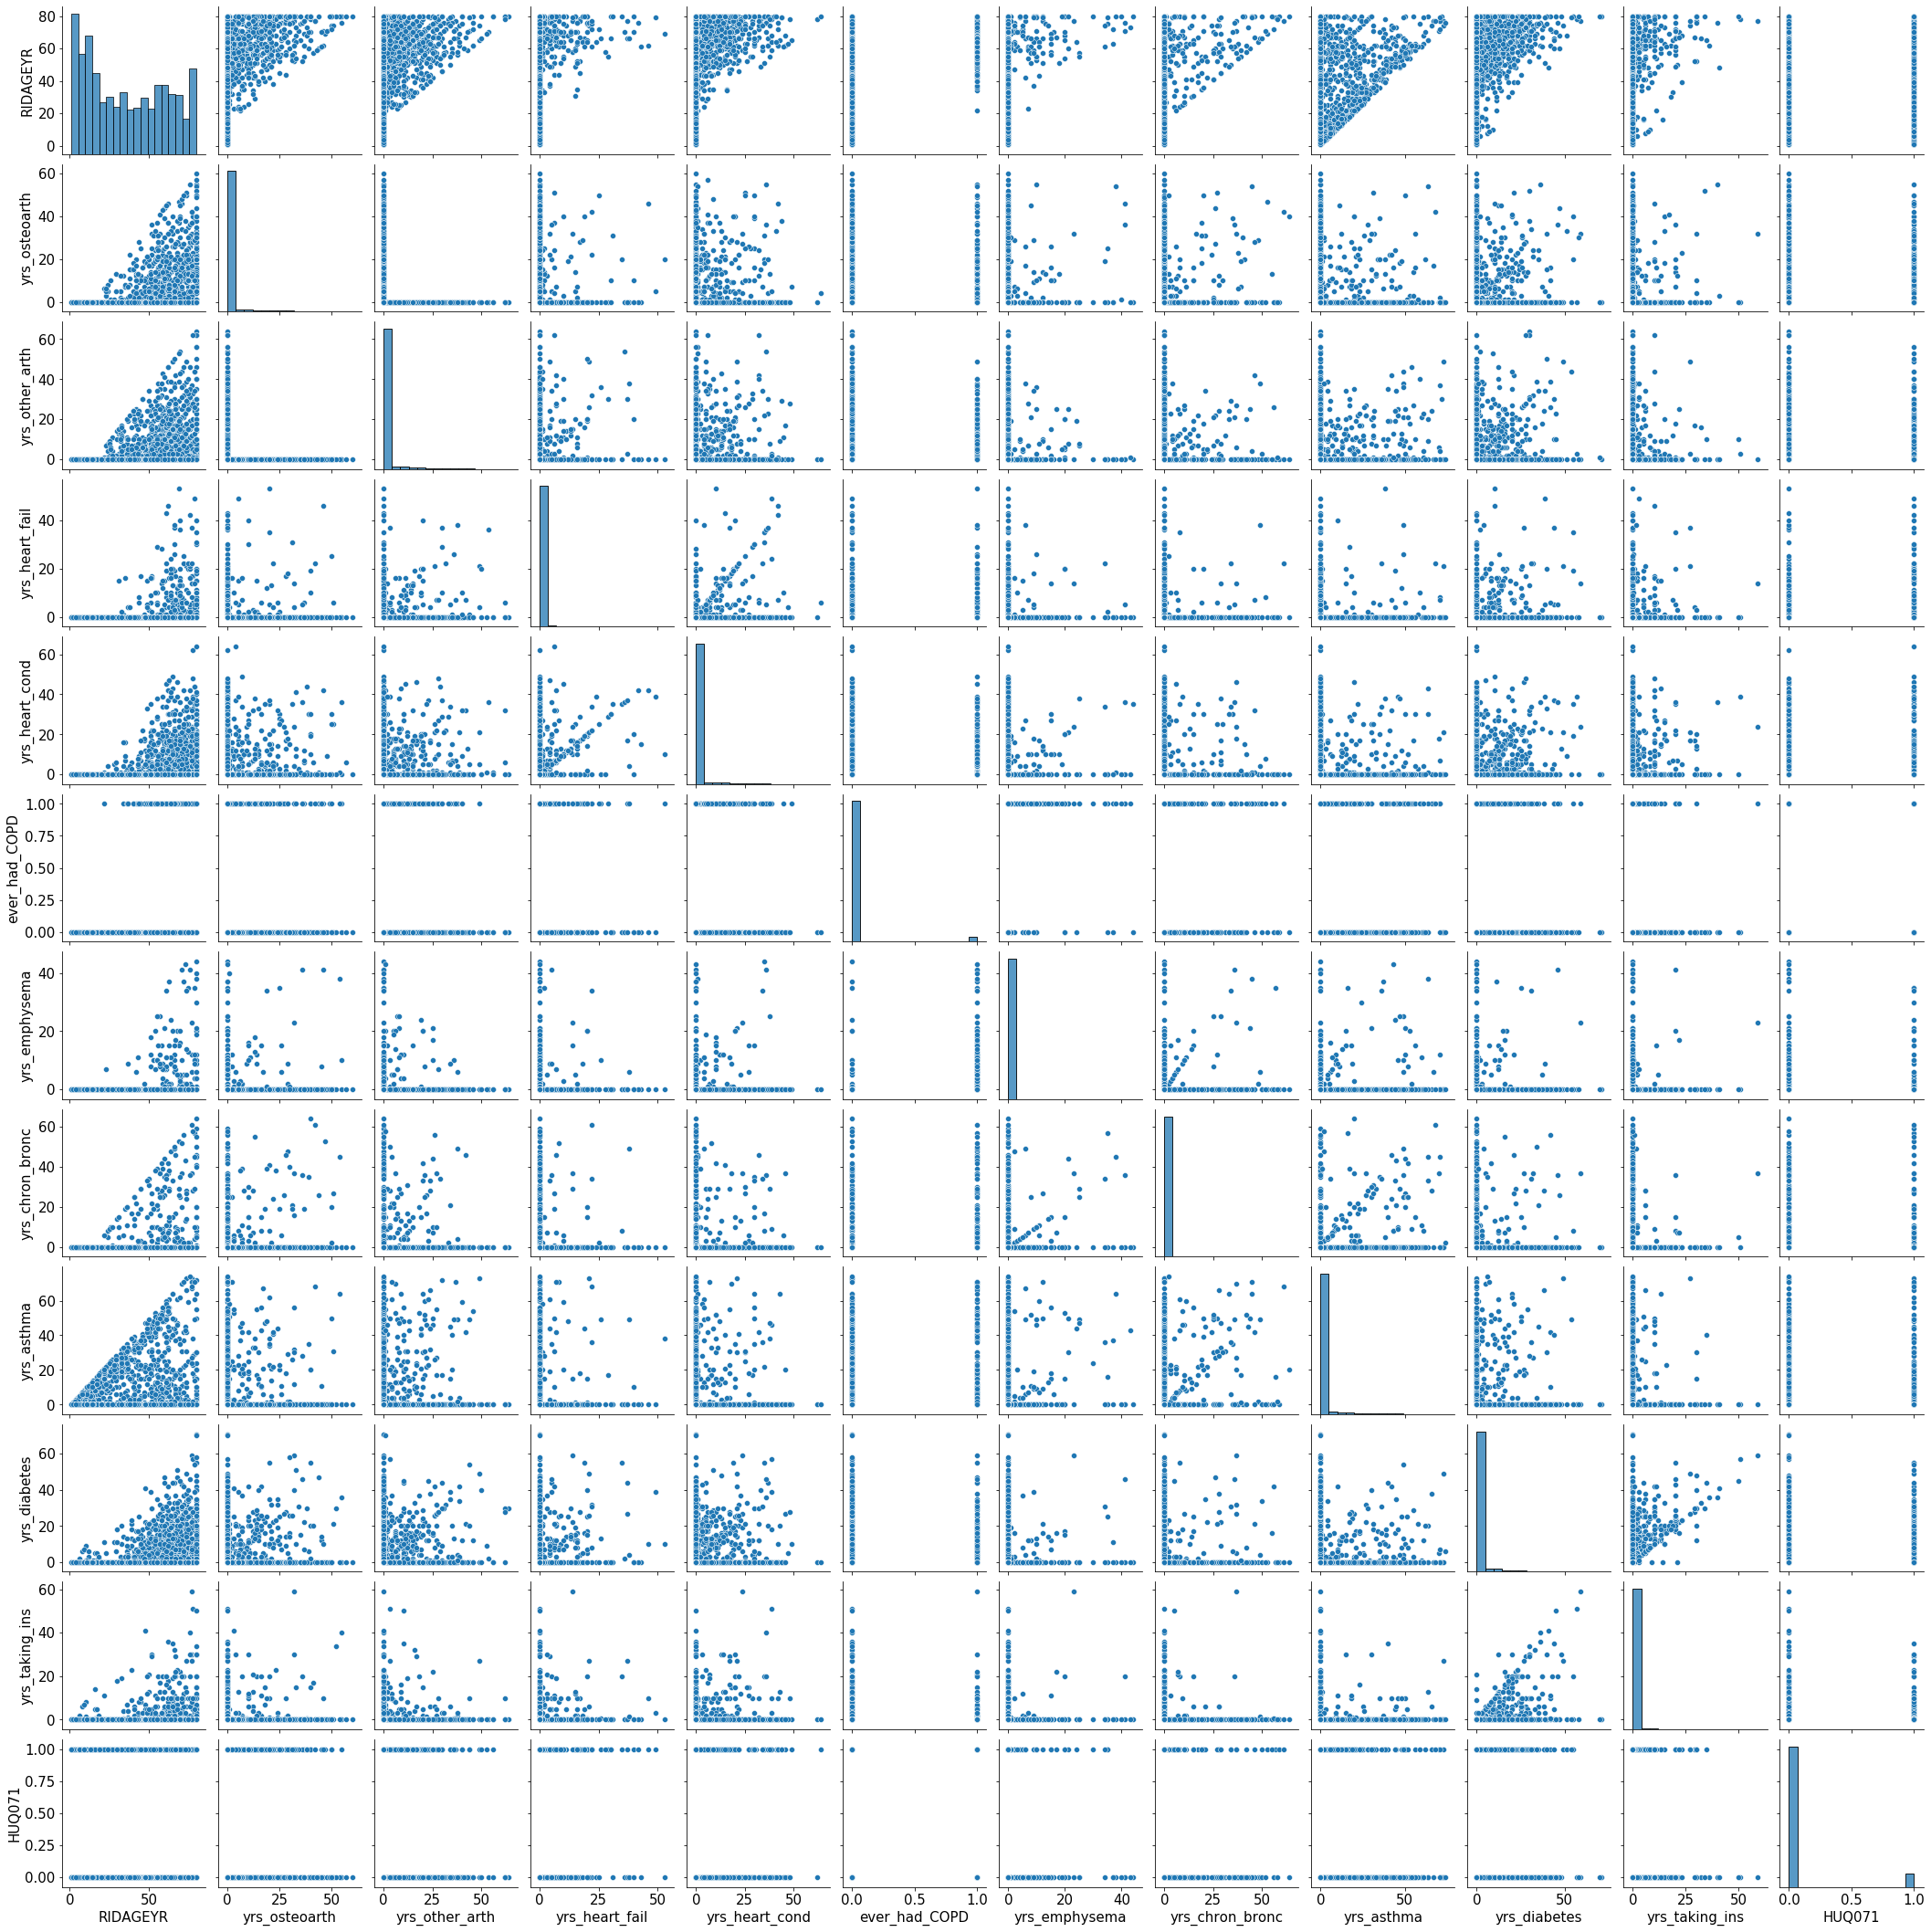

In [6]:
# check correlations between variables

sns.pairplot(yrs_df_3)


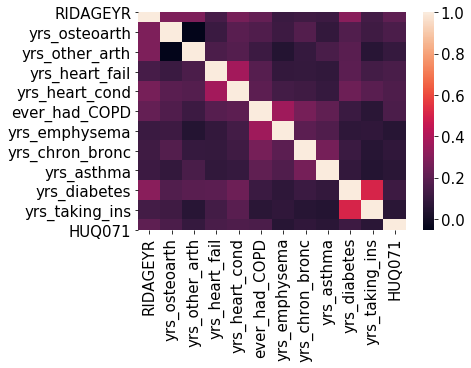

In [7]:
# check correlations with heatmap

corr = yrs_df_3.corr()
sns.heatmap(corr)

# no strong correlations
# even diabetes and taking insulin is only 50% correlated
# nothing is strongly correlated with hospitalization (HUQ071)


### Baseline Model: Logistic regression using continuous variables

In [8]:
# define X and y

X = yrs_df_3.drop(columns = ['HUQ071'])
y = yrs_df_3['HUQ071']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)


Classifier: LogisticRegression(max_iter=10000)
Cross-validation folds: 5


Train mean recall: 0.03 +/- 0.01
Train mean precision: 0.59 +/- 0.07
Train mean ROC-AUC: 0.51 +/- 0.0


Test mean recall: 0.02 +/- 0.01
Test mean precision: 0.45 +/- 0.18
Test mean ROC-AUC: 0.51 +/- 0.01


Feature weights: 
                   weight  abs_weight
RIDAGEYR         1.67940     1.67940
yrs_heart_fail   1.61490     1.61490
yrs_heart_cond   1.60670     1.60670
yrs_osteoarth    1.48310     1.48310
yrs_other_arth   0.98410     0.98410
ever_had_COPD    0.71110     0.71110
yrs_taking_ins   0.66050     0.66050
yrs_chron_bronc  0.21340     0.21340
yrs_emphysema   -0.10480     0.10480
yrs_asthma       0.08680     0.08680
yrs_diabetes     0.06540     0.06540 

Confusion matrices for each fold test set: 



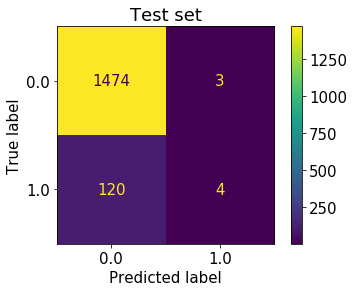

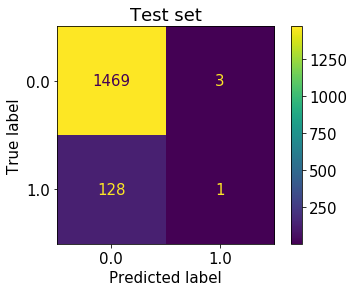

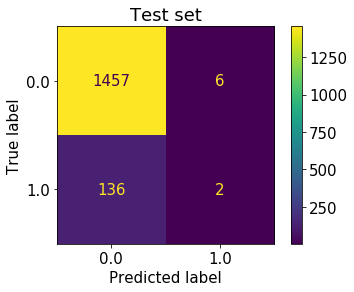

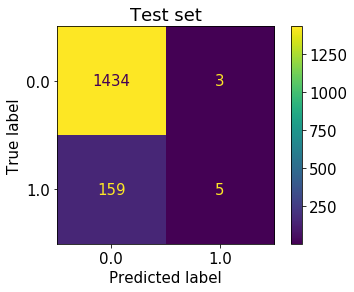

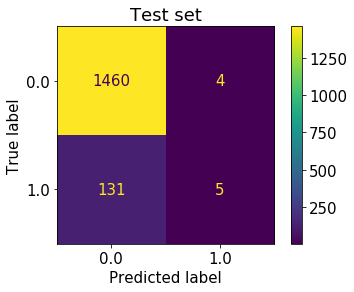

In [9]:
# start with basic logistic regression model
# recall way too low to be useful
# overfit

logreg = LogisticRegression(max_iter=10000)

ut.k_fold_validator(X=X_training, y=y_training, classifier=logreg, cv=5)


### Model 2: Logistic regression using continuous variables and balanced class weights

Classifier: LogisticRegression(class_weight='balanced', max_iter=10000)
Cross-validation folds: 5


Train mean recall: 0.62 +/- 0.01
Train mean precision: 0.16 +/- 0.01
Train mean ROC-AUC: 0.66 +/- 0.01


Test mean recall: 0.62 +/- 0.04
Test mean precision: 0.16 +/- 0.02
Test mean ROC-AUC: 0.65 +/- 0.02


Feature weights: 
                  weight  abs_weight
yrs_heart_cond  2.04340     2.04340
yrs_heart_fail  1.97430     1.97430
yrs_osteoarth   1.88470     1.88470
RIDAGEYR        1.60610     1.60610
yrs_other_arth  1.08130     1.08130
yrs_taking_ins  0.83050     0.83050
ever_had_COPD   0.70650     0.70650
yrs_chron_bronc 0.29250     0.29250
yrs_diabetes    0.15130     0.15130
yrs_asthma      0.09120     0.09120
yrs_emphysema   0.01730     0.01730 

Confusion matrices for each fold test set: 



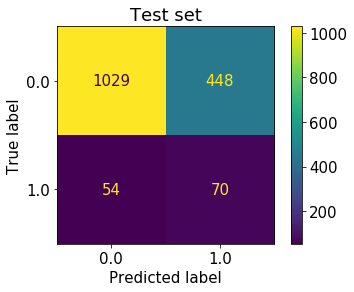

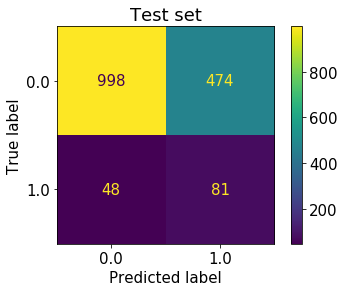

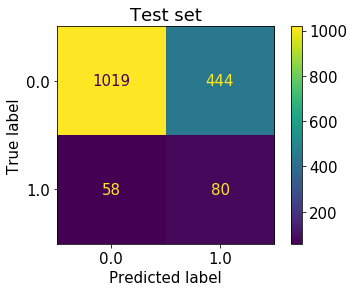

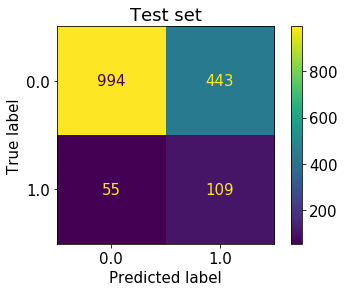

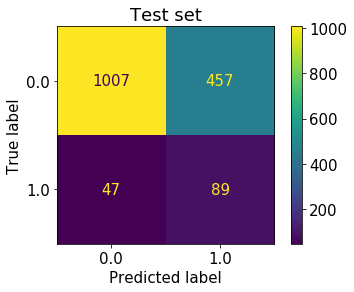

In [10]:
# big improvement over logistic regression without balanced class weight
# better recall, and less overfit
# precision does not pass 0.2 threshold

logreg = LogisticRegression(max_iter=10000, class_weight='balanced')

ut.k_fold_validator(X=X_training, y=y_training, classifier=logreg, cv=5)

### Model 3: Complement Naive Bayes model with continuous variables

Classifier: ComplementNB()
Cross-validation folds: 5


Train mean recall: 0.3 +/- 0.01
Train mean precision: 0.28 +/- 0.0
Train mean ROC-AUC: 0.61 +/- 0.0


Test mean recall: 0.3 +/- 0.01
Test mean precision: 0.27 +/- 0.02
Test mean ROC-AUC: 0.61 +/- 0.01


Feature weights: 
                  weight  abs_weight
yrs_emphysema   5.41350     5.41350
yrs_heart_fail  5.38400     5.38400
yrs_taking_ins  4.96720     4.96720
yrs_chron_bronc 4.68530     4.68530
yrs_heart_cond  3.95170     3.95170
yrs_osteoarth   3.58130     3.58130
yrs_diabetes    3.49430     3.49430
yrs_other_arth  3.48160     3.48160
yrs_asthma      3.29190     3.29190
ever_had_COPD   3.06700     3.06700
RIDAGEYR        0.24480     0.24480 

Confusion matrices for each fold test set: 



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


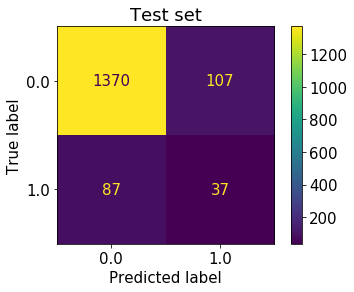

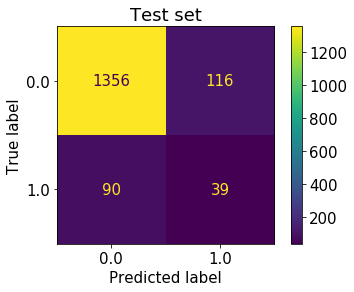

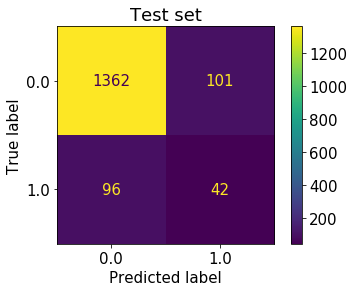

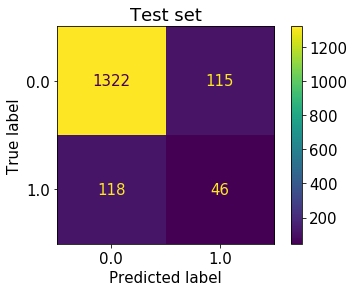

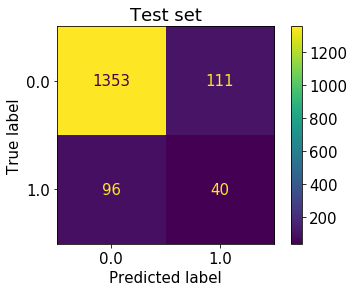

In [11]:
# test a complement Naive Bayes
# recall is worse than Model 2, but precision is above 0.2 threshold

CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)

### Model 4: Decision Tree with continuous variables

Classifier: DecisionTreeClassifier()
Cross-validation folds: 5


Train mean recall: 0.55 +/- 0.01
Train mean precision: 1.0 +/- 0.0
Train mean ROC-AUC: 0.77 +/- 0.0


Test mean recall: 0.14 +/- 0.01
Test mean precision: 0.24 +/- 0.02
Test mean ROC-AUC: 0.55 +/- 0.0


Feature weights: 
                  weight  abs_weight
RIDAGEYR        0.27550     0.27550
yrs_heart_cond  0.14030     0.14030
yrs_other_arth  0.11460     0.11460
yrs_diabetes    0.11360     0.11360
yrs_osteoarth   0.11270     0.11270
yrs_asthma      0.07660     0.07660
yrs_heart_fail  0.05810     0.05810
yrs_taking_ins  0.04570     0.04570
yrs_chron_bronc 0.02190     0.02190
ever_had_COPD   0.02130     0.02130
yrs_emphysema   0.01970     0.01970 

Confusion matrices for each fold test set: 



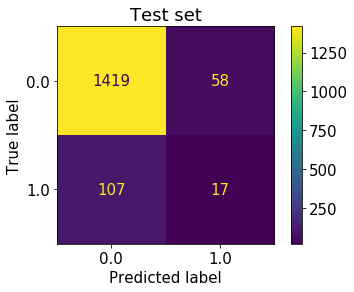

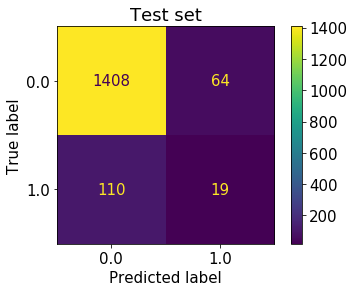

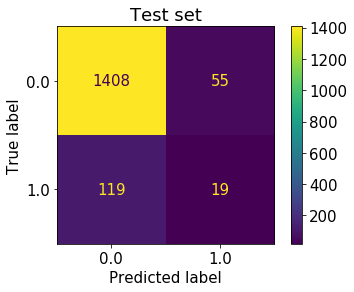

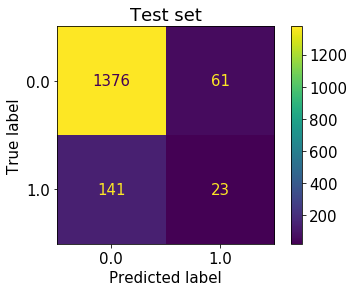

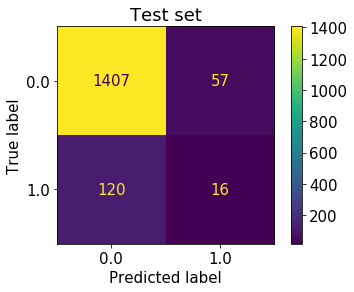

In [12]:
# test a decision tree
# extremely overfit!
# recall is low

tree = DecisionTreeClassifier()

ut.k_fold_validator(X_training, y_training, tree)

### Model 5: Decision Tree with continuous variables and balanced class weight

Classifier: DecisionTreeClassifier(class_weight='balanced')
Cross-validation folds: 5


Train mean recall: 0.77 +/- 0.01
Train mean precision: 0.4 +/- 0.02
Train mean ROC-AUC: 0.83 +/- 0.0


Test mean recall: 0.25 +/- 0.03
Test mean precision: 0.13 +/- 0.02
Test mean ROC-AUC: 0.55 +/- 0.01


Feature weights: 
                  weight  abs_weight
RIDAGEYR        0.46060     0.46060
yrs_heart_cond  0.10600     0.10600
yrs_osteoarth   0.09230     0.09230
yrs_diabetes    0.08740     0.08740
yrs_asthma      0.08640     0.08640
yrs_other_arth  0.07950     0.07950
yrs_taking_ins  0.02490     0.02490
ever_had_COPD   0.01680     0.01680
yrs_emphysema   0.01570     0.01570
yrs_chron_bronc 0.01560     0.01560
yrs_heart_fail  0.01470     0.01470 

Confusion matrices for each fold test set: 



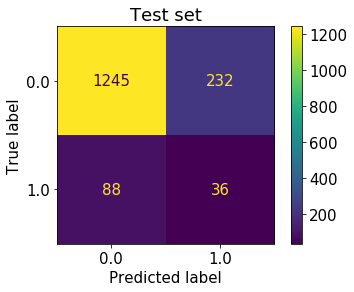

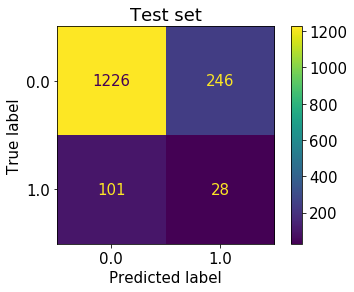

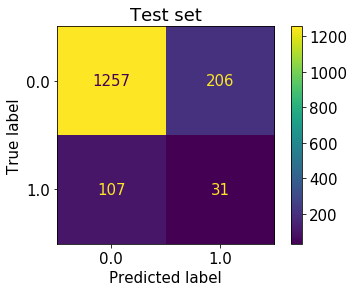

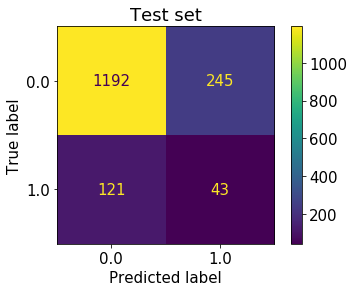

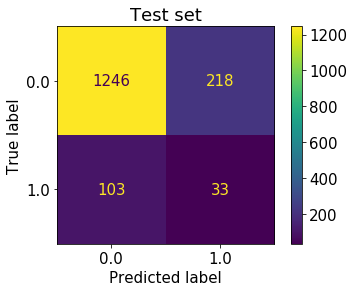

In [13]:
# try a decision tree with balanced class weight
# recall improved, but still overfit

tree = DecisionTreeClassifier(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, tree)

### Model 6: Pruned Decision Tree with continuous variables and balanced class weight

Classifier: DecisionTreeClassifier(class_weight='balanced', max_features=10,
                       min_samples_leaf=10, min_samples_split=10)
Cross-validation folds: 5


Train mean recall: 0.73 +/- 0.01
Train mean precision: 0.24 +/- 0.01
Train mean ROC-AUC: 0.75 +/- 0.0


Test mean recall: 0.51 +/- 0.03
Test mean precision: 0.17 +/- 0.01
Test mean ROC-AUC: 0.64 +/- 0.01


Feature weights: 
                  weight  abs_weight
RIDAGEYR        0.58190     0.58190
yrs_heart_cond  0.14300     0.14300
yrs_osteoarth   0.08080     0.08080
yrs_diabetes    0.05800     0.05800
yrs_other_arth  0.05650     0.05650
yrs_asthma      0.04580     0.04580
ever_had_COPD   0.02270     0.02270
yrs_emphysema   0.00420     0.00420
yrs_heart_fail  0.00400     0.00400
yrs_chron_bronc 0.00330     0.00330
yrs_taking_ins  0.00000     0.00000 

Confusion matrices for each fold test set: 



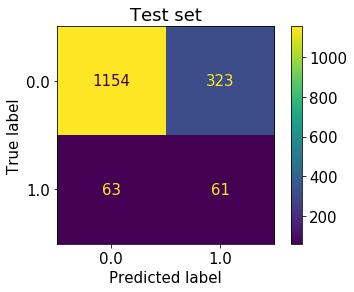

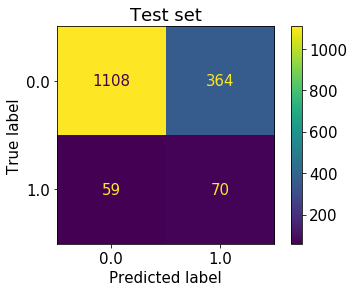

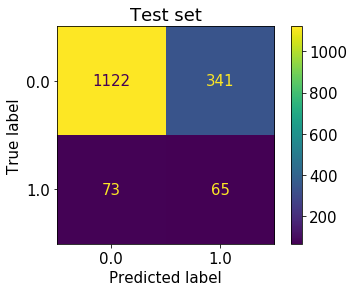

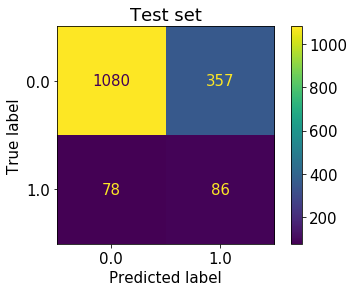

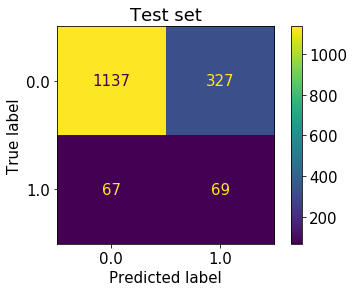

In [14]:
# try to prune the tree
# I used a grid search to get these hyperparameters with scoring=recall
# recall is better but this is still overfit

tree = DecisionTreeClassifier(class_weight='balanced', max_features=10, min_samples_leaf=10, min_samples_split=10)

ut.k_fold_validator(X_training, y_training, tree)

### Model 7: Better Pruned Decision Tree with continuous variables and balanced class weight

Classifier: DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Train mean recall: 0.6 +/- 0.06
Train mean precision: 0.21 +/- 0.03
Train mean ROC-AUC: 0.69 +/- 0.0


Test mean recall: 0.53 +/- 0.09
Test mean precision: 0.19 +/- 0.04
Test mean ROC-AUC: 0.66 +/- 0.02


Feature weights: 
                  weight  abs_weight
RIDAGEYR        0.63710     0.63710
yrs_heart_cond  0.21600     0.21600
yrs_osteoarth   0.07370     0.07370
ever_had_COPD   0.03580     0.03580
yrs_asthma      0.01710     0.01710
yrs_diabetes    0.01040     0.01040
yrs_taking_ins  0.00560     0.00560
yrs_heart_fail  0.00440     0.00440
yrs_other_arth  0.00000     0.00000
yrs_emphysema   0.00000     0.00000
yrs_chron_bronc 0.00000     0.00000 

Confusion matrices for each fold test set: 



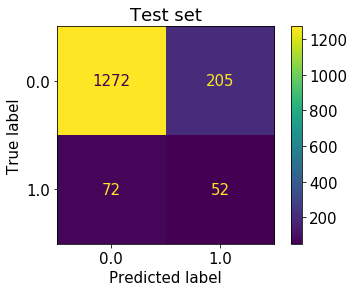

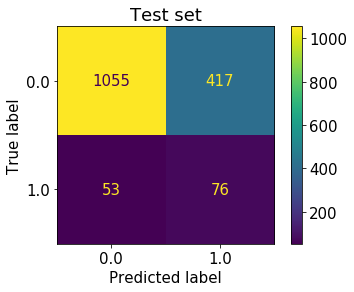

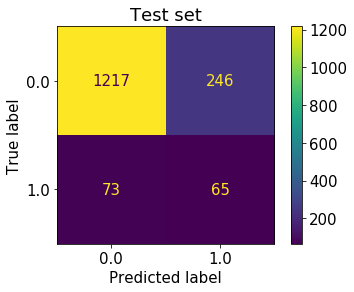

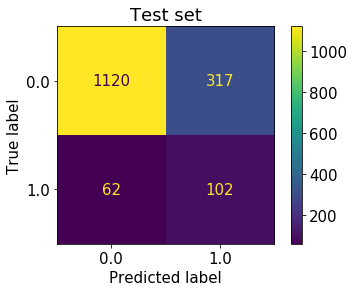

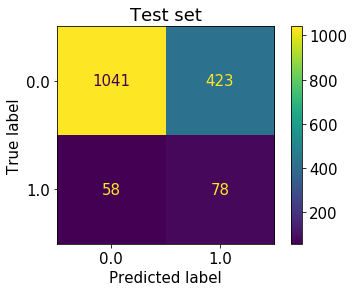

In [15]:
# I used manual testing to get these hyperparameters
# kept increasing min_samples_split
# test recall plateaued at min_samples_split=300
# much less overfit
# test precision doesn't quite meet 0.2 threshold

tree = DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_split=300)

ut.k_fold_validator(X_training, y_training, tree)

### Model 8: Logistic Regression with binary variables and balanced class weight

Models 8-12 test whether binary variables work better than the continuous (years-based) variables used above.  Since logistic regression, naive Bayes, and decision tree models all showed potential, I will continue to test them all here.

In [16]:
binary_df = pd.read_csv('data/binary_df').set_index('SEQN')

In [17]:
# minority class is  8.5%, as above

binary_df['HUQ071'].value_counts(normalize=True)

0.00000   0.91455
1.00000   0.08545
Name: HUQ071, dtype: float64

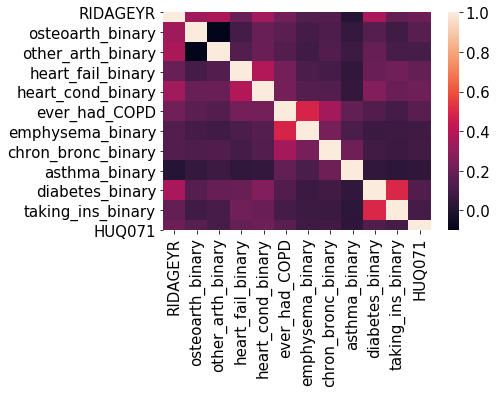

In [18]:
corr = binary_df.corr()
sns.heatmap(corr)

# no strong correlations
# even diabetes and taking insulin is only 50% correlated
# nothing is strongly correlated with hospitalization (HUQ071)

In [19]:
# define X and y

X = binary_df.drop(columns = 'HUQ071')
y = binary_df['HUQ071']

In [20]:
# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)

Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Train mean recall: 0.61 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.68 +/- 0.0


Test mean recall: 0.6 +/- 0.02
Test mean precision: 0.18 +/- 0.02
Test mean ROC-AUC: 0.67 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           1.26170     1.26170
heart_cond_binary  0.89160     0.89160
heart_fail_binary  0.86460     0.86460
osteoarth_binary   0.75930     0.75930
ever_had_COPD      0.53660     0.53660
other_arth_binary  0.32840     0.32840
asthma_binary      0.18080     0.18080
emphysema_binary   0.14910     0.14910
diabetes_binary    0.14540     0.14540
chron_bronc_binary 0.12450     0.12450
taking_ins_binary  0.12410     0.12410 

Confusion matrices for each fold test set: 



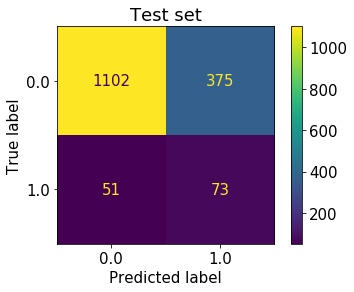

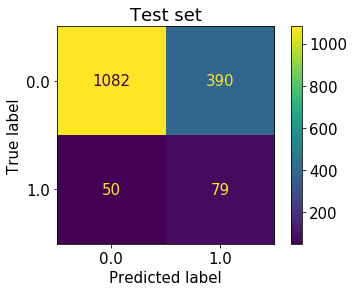

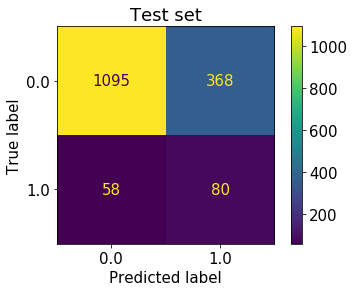

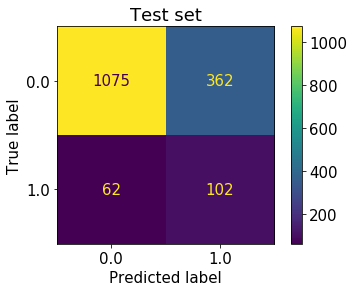

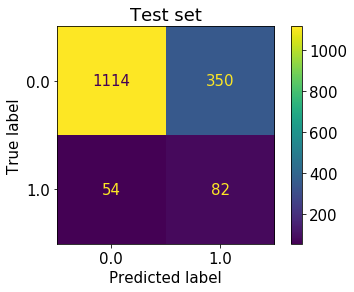

In [21]:
# try a Logistic Regression with binary variables balanced class weight
# recall is slightly worse, but precision is closer to the 0.2 threshold
# so this is better than Model 2, logistic regression with continuous variables and balanced class weight

logreg = LogisticRegression(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, logreg)

### Model 9: Complement Naive Bayes model with binary variables

Classifier: ComplementNB()
Cross-validation folds: 5


Train mean recall: 0.41 +/- 0.02
Train mean precision: 0.26 +/- 0.02
Train mean ROC-AUC: 0.65 +/- 0.0


Test mean recall: 0.41 +/- 0.05
Test mean precision: 0.26 +/- 0.03
Test mean ROC-AUC: 0.65 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   4.66390     4.66390
heart_fail_binary  4.21200     4.21200
chron_bronc_binary 4.05590     4.05590
taking_ins_binary  3.69590     3.69590
ever_had_COPD      3.56530     3.56530
heart_cond_binary  2.81920     2.81920
osteoarth_binary   2.62620     2.62620
asthma_binary      2.36340     2.36340
diabetes_binary    2.33120     2.33120
other_arth_binary  2.24040     2.24040
RIDAGEYR           0.74310     0.74310 

Confusion matrices for each fold test set: 



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


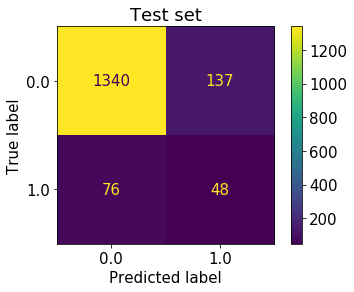

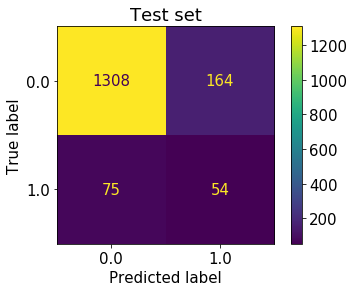

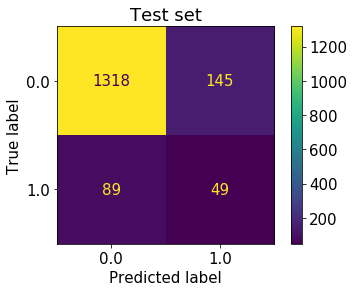

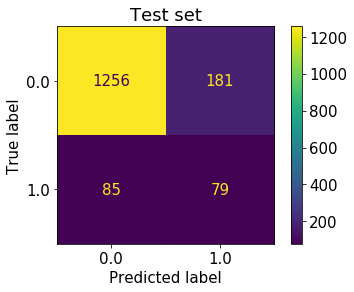

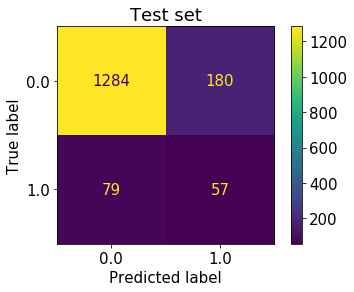

In [22]:
# try a complement naive Bayes
# recall is much better than in Model 3, Complement Naive Bayes with continuous variables

CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)

### Model 10: Decision Tree with binary variables and balanced class weight

Classifier: DecisionTreeClassifier(class_weight='balanced')
Cross-validation folds: 5


Train mean recall: 0.77 +/- 0.01
Train mean precision: 0.28 +/- 0.01
Train mean ROC-AUC: 0.79 +/- 0.0


Test mean recall: 0.35 +/- 0.03
Test mean precision: 0.13 +/- 0.01
Test mean ROC-AUC: 0.57 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.62160     0.62160
heart_cond_binary  0.09230     0.09230
diabetes_binary    0.05950     0.05950
asthma_binary      0.05350     0.05350
osteoarth_binary   0.04220     0.04220
other_arth_binary  0.02730     0.02730
ever_had_COPD      0.02670     0.02670
taking_ins_binary  0.02600     0.02600
chron_bronc_binary 0.02180     0.02180
emphysema_binary   0.01610     0.01610
heart_fail_binary  0.01300     0.01300 

Confusion matrices for each fold test set: 



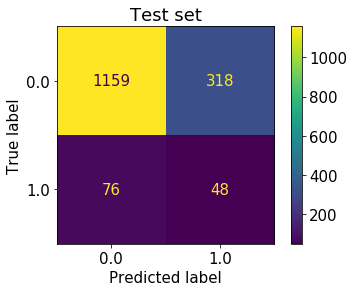

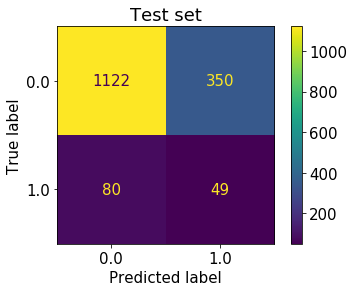

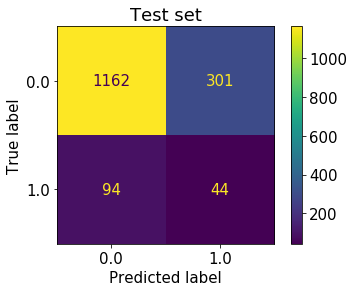

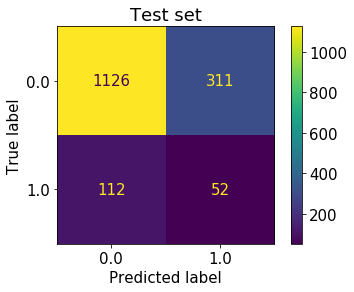

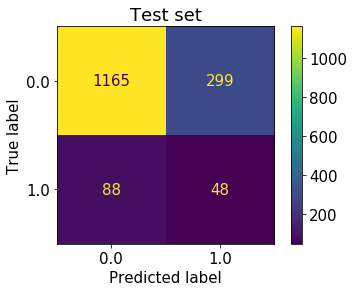

In [23]:
# overfit, as before

tree = DecisionTreeClassifier(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, tree)

### Model 11: Pruned Decision Tree with binary variables and balanced class weight

Classifier: DecisionTreeClassifier(class_weight='balanced', max_features=10,
                       min_samples_leaf=10, min_samples_split=8)
Cross-validation folds: 5


Train mean recall: 0.73 +/- 0.02
Train mean precision: 0.21 +/- 0.01
Train mean ROC-AUC: 0.73 +/- 0.0


Test mean recall: 0.57 +/- 0.04
Test mean precision: 0.16 +/- 0.01
Test mean ROC-AUC: 0.65 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.70890     0.70890
heart_cond_binary  0.13760     0.13760
osteoarth_binary   0.04310     0.04310
asthma_binary      0.02780     0.02780
ever_had_COPD      0.02630     0.02630
diabetes_binary    0.02080     0.02080
other_arth_binary  0.01910     0.01910
taking_ins_binary  0.00910     0.00910
chron_bronc_binary 0.00380     0.00380
heart_fail_binary  0.00370     0.00370
emphysema_binary   0.00000     0.00000 

Confusion matrices for each fold test set: 



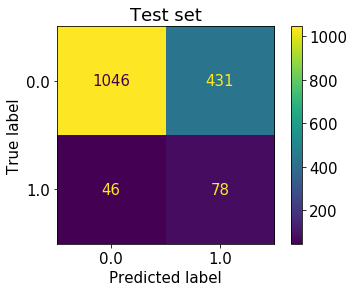

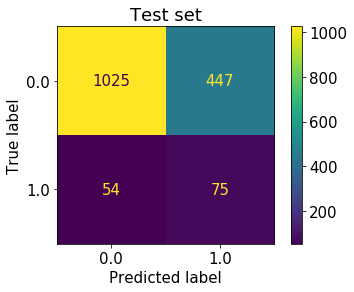

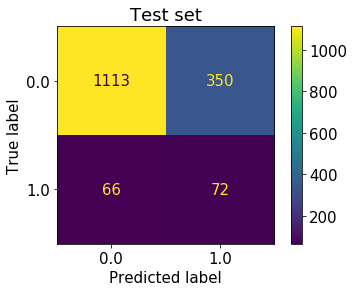

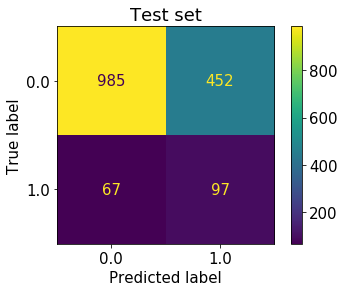

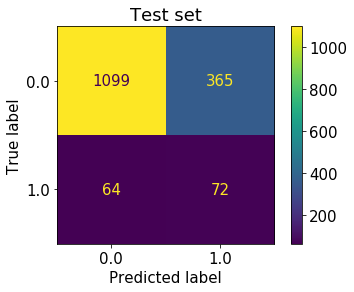

In [24]:
# still overfit, as before

tree = DecisionTreeClassifier(class_weight='balanced', 
                              max_features=10,
                              min_samples_leaf=10, 
                              min_samples_split=8)

ut.k_fold_validator(X_training, y_training, tree)

### Model 12: Better pruned Decision Tree with binary variables

Classifier: DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Train mean recall: 0.62 +/- 0.07
Train mean precision: 0.2 +/- 0.03
Train mean ROC-AUC: 0.69 +/- 0.0


Test mean recall: 0.58 +/- 0.07
Test mean precision: 0.19 +/- 0.04
Test mean ROC-AUC: 0.67 +/- 0.02


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.67810     0.67810
heart_cond_binary  0.20400     0.20400
osteoarth_binary   0.05420     0.05420
ever_had_COPD      0.03910     0.03910
asthma_binary      0.01320     0.01320
taking_ins_binary  0.00690     0.00690
heart_fail_binary  0.00460     0.00460
other_arth_binary  0.00000     0.00000
emphysema_binary   0.00000     0.00000
chron_bronc_binary 0.00000     0.00000
diabetes_binary    0.00000     0.00000 

Confusion matrices for each fold test set: 



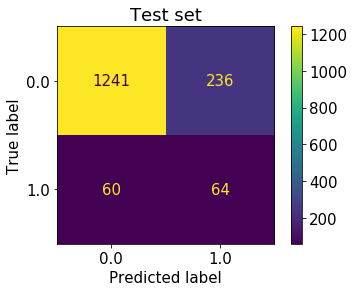

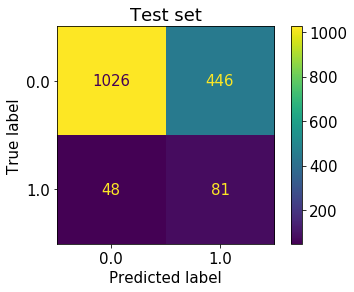

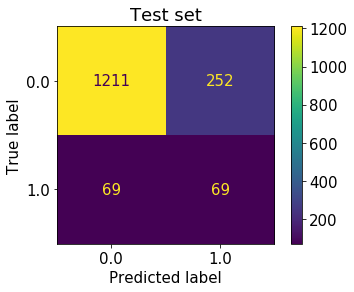

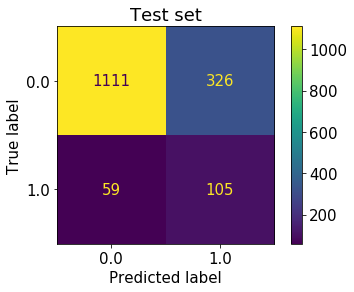

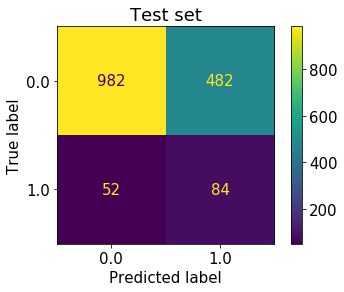

In [25]:
# recall improved over Model 7, better pruned tree with continuous variables
# precision stayed the same, 0.19

tree = DecisionTreeClassifier(class_weight='balanced', max_depth=6, min_samples_split=300)

ut.k_fold_validator(X_training, y_training, tree)

### Model 13: Random Forest Classifier with binary variables

Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Train mean recall: 0.63 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.69 +/- 0.0


Test mean recall: 0.62 +/- 0.02
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.68 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.41750     0.41750
heart_cond_binary  0.21590     0.21590
osteoarth_binary   0.13590     0.13590
heart_fail_binary  0.05740     0.05740
ever_had_COPD      0.04960     0.04960
other_arth_binary  0.04480     0.04480
diabetes_binary    0.03980     0.03980
asthma_binary      0.01080     0.01080
taking_ins_binary  0.01060     0.01060
emphysema_binary   0.00920     0.00920
chron_bronc_binary 0.00830     0.00830 

Confusion matrices for each fold test set: 



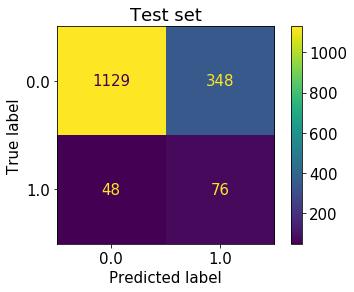

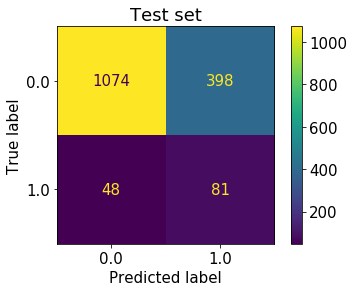

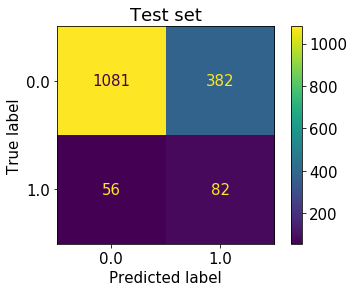

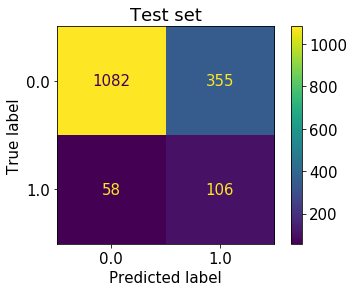

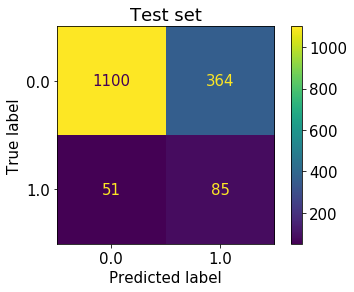

In [26]:
# looks like for all models, binary variables work better than continuous
# since the decision tree shows promise, test a random forest
# recall improved over decision tree, precision still at 0.19

forest = RandomForestClassifier(n_estimators=100, 
                                criterion='gini', 
                                max_depth=6, 
                                min_samples_split=300,
                                class_weight='balanced')

ut.k_fold_validator(X_training, y_training, forest, cv=5)

### Model 14: Logistic Regression with binary variables, balanced class weight, updated hospitalizations

Models 16- test an updated target, in which participants whose only hospitalization was for childbirth were not labeled as hospitalized.  From here on, all models use binary variables for medical conditions.

In [27]:
# try with updated non-birth hospitalizations

binary_df_2 = pd.read_csv('data/binary_df_2').set_index('SEQN')
binary_df_2

RIDAGEYR  osteoarth_binary  other_arth_binary  \
SEQN                                                          
93703.00000    2.00000           0.00000            0.00000   
93704.00000    2.00000           0.00000            0.00000   
93705.00000   66.00000           0.00000            1.00000   
93706.00000   18.00000           0.00000            0.00000   
93707.00000   13.00000           0.00000            0.00000   
...                ...               ...                ...   
102952.00000  70.00000           0.00000            0.00000   
102953.00000  42.00000           0.00000            0.00000   
102954.00000  41.00000           0.00000            0.00000   
102955.00000  14.00000           0.00000            0.00000   
102956.00000  38.00000           1.00000            0.00000   

              heart_fail_binary  heart_cond_binary  ever_had_COPD  \
SEQN                                                                
93703.00000             0.00000            0.00000        0.00000   
93704.00000             0.00000            0.00000        0.00000   
93705.00000             0.00000            0.00000        0.00000   
93706.00000             0.00000            0.00000        0.00000   
93707.00000             0.00000            0.00000        0.00000   
...                         ...                ...            ...   
102952.00000            0.00000            0.00000        0.00000   
102953.00000            0.00000            0.00000        0.00000   
102954.00000            0.00000            0.00000        0.00000   
102955.00000            0.00000            0.00000        0.00000   
102956.00000            0.00000            0.00000        0.00000   

              emphysema_binary  chron_bronc_binary  asthma_binary  \
SEQN                                                                
93703.00000            0.00000             0.00000        0.00000   
93704.00000            0.00000             0.00000        0.00000   
93705.00000            0.00000             0.00000        0.00000   
93706.00000            0.00000             0.00000        0.00000   
93707.00000            0.00000             0.00000        0.00000   
...                        ...                 ...            ...   
102952.00000           0.00000             0.00000        0.00000   
102953.00000           0.00000             0.00000        0.00000   
102954.00000           0.00000             0.00000        0.00000   
102955.00000           0.00000             0.00000        0.00000   
102956.00000           0.00000             0.00000        0.00000   

              diabetes_binary  taking_ins_binary  updated_hosp  
SEQN                                                            
93703.00000           0.00000            0.00000       0.00000  
93704.00000           0.00000            0.00000       0.00000  
93705.00000           0.00000            0.00000       0.00000  
93706.00000           0.00000            0.00000       0.00000  
93707.00000           0.00000            0.00000       0.00000  
...                       ...                ...           ...  
102952.00000          0.00000            0.00000       0.00000  
102953.00000          0.00000            0.00000       0.00000  
102954.00000          0.00000            0.00000       0.00000  
102955.00000          0.00000            0.00000       0.00000  
102956.00000          0.00000            0.00000       0.00000  

[8894 rows x 12 columns]

In [28]:
# define X and y

X = binary_df_2.drop(columns = 'updated_hosp')
y = binary_df_2['updated_hosp']

In [29]:
# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)

Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Train mean recall: 0.64 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.7 +/- 0.0


Test mean recall: 0.63 +/- 0.02
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.7 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           1.36560     1.36560
heart_cond_binary  0.94720     0.94720
heart_fail_binary  0.88350     0.88350
osteoarth_binary   0.84930     0.84930
ever_had_COPD      0.49940     0.49940
other_arth_binary  0.42070     0.42070
emphysema_binary   0.20890     0.20890
chron_bronc_binary 0.17320     0.17320
diabetes_binary    0.16950     0.16950
asthma_binary      0.14650     0.14650
taking_ins_binary  0.14370     0.14370 

Confusion matrices for each fold test set: 



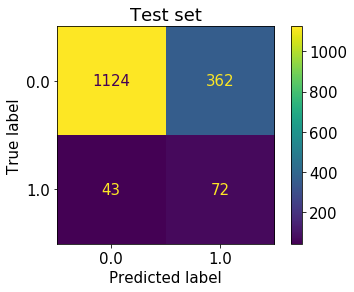

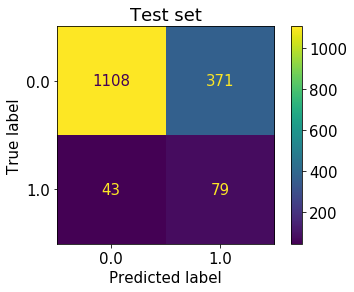

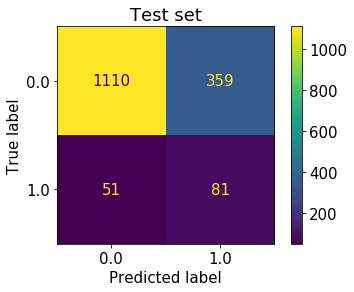

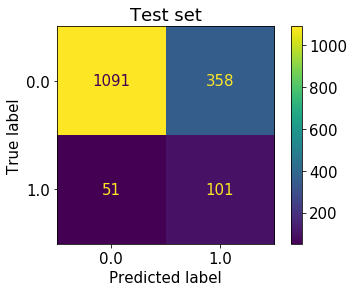

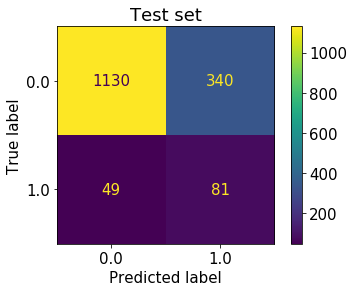

In [30]:
# try a Logistic Regression
# both recall and precision improved over Model 8

logreg = LogisticRegression(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, logreg)

### Model 15: Complement Naive Bayes model with binary variables and updated target

Classifier: ComplementNB()
Cross-validation folds: 5


Train mean recall: 0.44 +/- 0.01
Train mean precision: 0.26 +/- 0.02
Train mean ROC-AUC: 0.66 +/- 0.0


Test mean recall: 0.44 +/- 0.06
Test mean precision: 0.26 +/- 0.03
Test mean ROC-AUC: 0.66 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   4.66730     4.66730
heart_fail_binary  4.21540     4.21540
chron_bronc_binary 4.05940     4.05940
taking_ins_binary  3.69930     3.69930
ever_had_COPD      3.56190     3.56190
heart_cond_binary  2.82260     2.82260
osteoarth_binary   2.62960     2.62960
asthma_binary      2.35870     2.35870
diabetes_binary    2.33260     2.33260
other_arth_binary  2.24380     2.24380
RIDAGEYR           0.74180     0.74180 

Confusion matrices for each fold test set: 



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


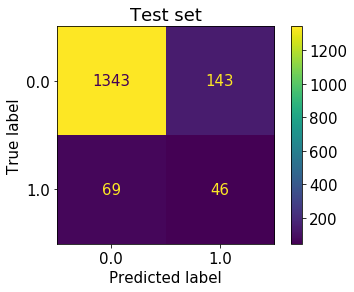

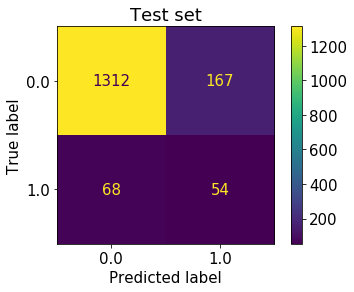

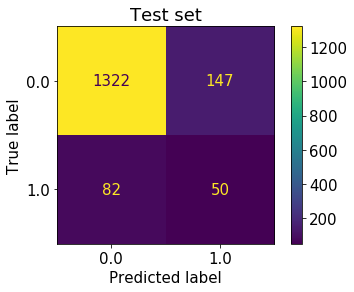

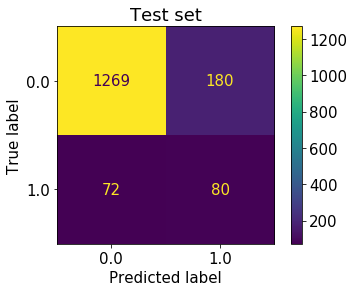

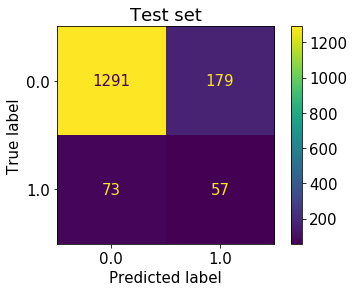

In [31]:
# try a complement naive Bayes
# recall improved over Model 9

CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)

### Model 16: Random Forest with binary variables and updated target

Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Train mean recall: 0.66 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.0


Test mean recall: 0.65 +/- 0.02
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.7 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.40600     0.40600
heart_cond_binary  0.24030     0.24030
osteoarth_binary   0.10960     0.10960
diabetes_binary    0.05820     0.05820
ever_had_COPD      0.05370     0.05370
heart_fail_binary  0.05260     0.05260
other_arth_binary  0.04950     0.04950
asthma_binary      0.00860     0.00860
emphysema_binary   0.00740     0.00740
chron_bronc_binary 0.00730     0.00730
taking_ins_binary  0.00690     0.00690 

Confusion matrices for each fold test set: 



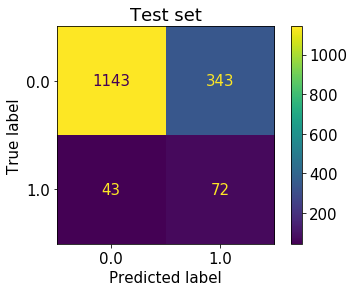

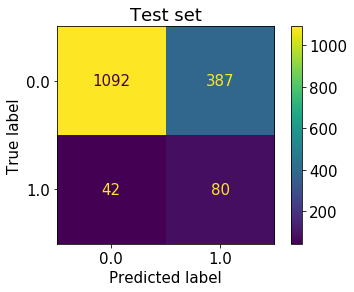

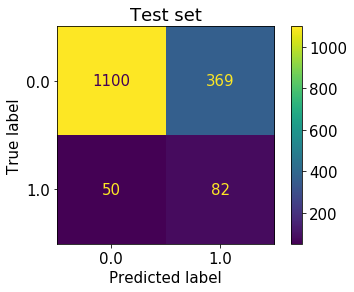

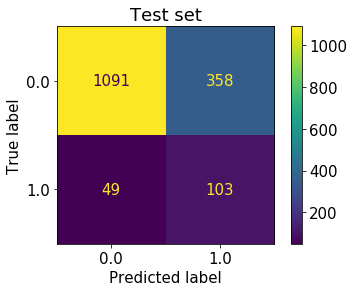

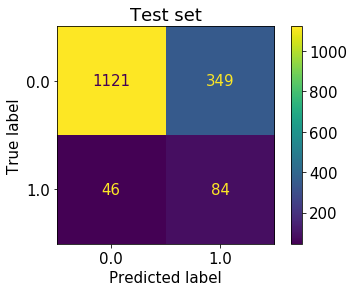

In [32]:
# improved recall over Model 13, precision still slightly too low

ut.k_fold_validator(X_training, y_training, forest, cv=5)

### Model 17: Adaptive Boosted Tree Model

Classifier: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         max_features=7,
                                                         max_leaf_nodes=25,
                                                         min_samples_leaf=200,
                                                         min_samples_split=1000),
                   n_estimators=100)
Cross-validation folds: 5


Train mean recall: 0.65 +/- 0.01
Train mean precision: 0.2 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.01


Test mean recall: 0.63 +/- 0.04
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.7 +/- 0.02




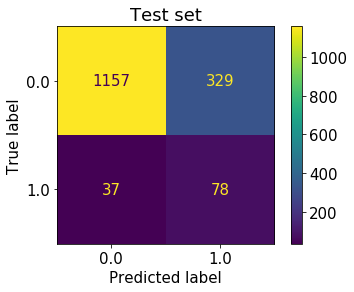

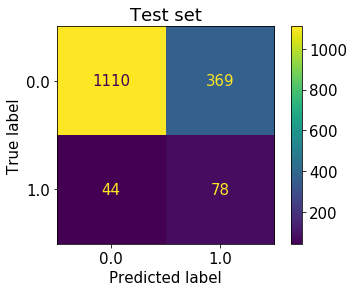

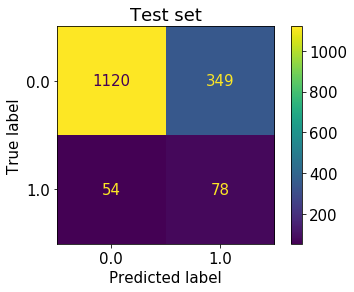

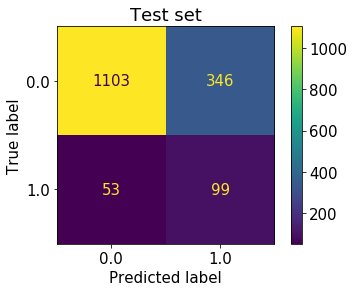

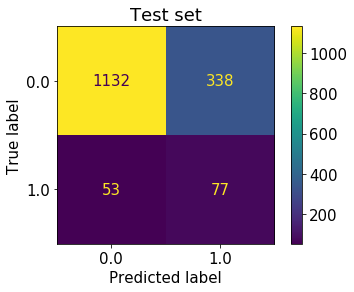

In [33]:
# since the random forest is working well, try adaptive boosted and gradient boosted tree models
# parameters below attained by trial and error to reduce overfitting
# recall worse than random forest

tree = DecisionTreeClassifier(class_weight='balanced',
                              max_features=7,
                              min_samples_leaf=200,
                            max_depth=2,
                            min_samples_split=1000,
                             max_leaf_nodes=25,
                             criterion='entropy')

Ada = AdaBoostClassifier(base_estimator=tree, n_estimators=100)

ut.k_fold_validator(X_training, y_training, Ada, cv=5)

### Model 18: Gradient Boosted Tree Model

Classifier: GradientBoostingClassifier(init=DecisionTreeClassifier(class_weight='balanced',
                                                       criterion='entropy',
                                                       max_depth=2,
                                                       max_features=7,
                                                       max_leaf_nodes=25,
                                                       min_samples_leaf=200,
                                                       min_samples_split=1000),
                           max_depth=2, max_features=7, max_leaf_nodes=25,
                           min_samples_leaf=200, min_samples_split=1000)
Cross-validation folds: 5


Train mean recall: 0.02 +/- 0.01
Train mean precision: 0.44 +/- 0.1
Train mean ROC-AUC: 0.51 +/- 0.0


Test mean recall: 0.02 +/- 0.01
Test mean precision: 0.42 +/- 0.27
Test mean ROC-AUC: 0.51 +/- 0.01




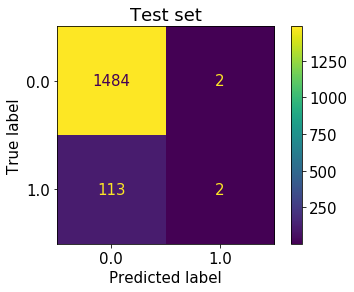

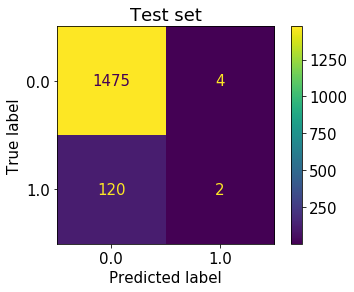

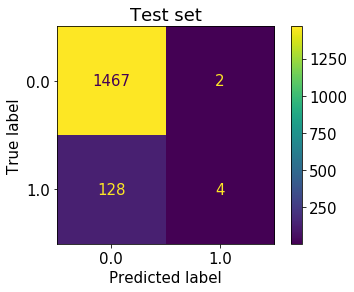

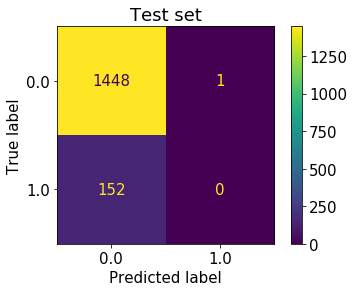

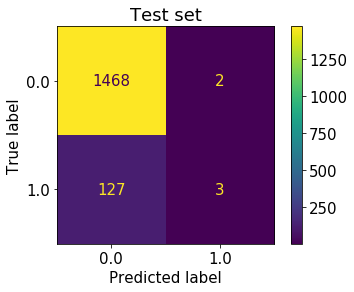

In [34]:
# recall extremely low
# seems to be no way to set recall and precision as the goal rather than reducing mean squared error

GBC = GradientBoostingClassifier(init=tree,
                              max_features=7,
                              min_samples_leaf=200,
                            max_depth=2,
                            min_samples_split=1000,
                             max_leaf_nodes=25)

ut.k_fold_validator(X_training, y_training, GBC, cv=5)

### Model 19: Logistic regression with race feature

In [35]:
# add race

binary_df_3 = pd.read_csv('data/binary_df_3').set_index('SEQN')
binary_df_3.head(200)

RIDAGEYR  osteoarth_binary  other_arth_binary  heart_fail_binary  \
SEQN                                                                            
93703.00000   2.00000           0.00000            0.00000            0.00000   
93704.00000   2.00000           0.00000            0.00000            0.00000   
93705.00000  66.00000           0.00000            1.00000            0.00000   
93706.00000  18.00000           0.00000            0.00000            0.00000   
93707.00000  13.00000           0.00000            0.00000            0.00000   
93708.00000  66.00000           0.00000            0.00000            0.00000   
93709.00000  75.00000           0.00000            1.00000            0.00000   
93711.00000  56.00000           0.00000            0.00000            0.00000   
93712.00000  18.00000           0.00000            0.00000            0.00000   
93713.00000  67.00000           0.00000            1.00000            0.00000   
93714.00000  54.00000           0.00000            0.00000            0.00000   
93715.00000  71.00000           1.00000            0.00000            0.00000   
93716.00000  61.00000           0.00000            1.00000            0.00000   
93717.00000  22.00000           0.00000            0.00000            0.00000   
93718.00000  45.00000           0.00000            0.00000            0.00000   
93719.00000  13.00000           0.00000            0.00000            0.00000   
93720.00000   1.00000           0.00000            0.00000            0.00000   
93721.00000  60.00000           0.00000            0.00000            0.00000   
93722.00000  60.00000           0.00000            0.00000            0.00000   
93723.00000  64.00000           1.00000            0.00000            0.00000   
93724.00000   5.00000           0.00000            0.00000            0.00000   
93725.00000   9.00000           0.00000            0.00000            0.00000   
93726.00000  67.00000           0.00000            0.00000            0.00000   
93727.00000  70.00000           0.00000            0.00000            0.00000   
93728.00000  53.00000           0.00000            0.00000            0.00000   
93729.00000  42.00000           0.00000            0.00000            0.00000   
93730.00000  57.00000           0.00000            0.00000            0.00000   
93731.00000  20.00000           0.00000            0.00000            0.00000   
93732.00000  72.00000           0.00000            0.00000            0.00000   
93733.00000  11.00000           0.00000            0.00000            0.00000   
93734.00000  13.00000           0.00000            0.00000            0.00000   
93735.00000  52.00000           0.00000            0.00000            0.00000   
93736.00000  11.00000           0.00000            0.00000            0.00000   
93737.00000   8.00000           0.00000            0.00000            0.00000   
93738.00000  26.00000           0.00000            0.00000            0.00000   
93739.00000   5.00000           0.00000            0.00000            0.00000   
93740.00000  72.00000           0.00000            1.00000            1.00000   
93741.00000   9.00000           0.00000            0.00000            0.00000   
93742.00000  72.00000           1.00000            0.00000            0.00000   
93743.00000  61.00000           0.00000            1.00000            0.00000   
93744.00000  10.00000           0.00000            0.00000            0.00000   
93745.00000   5.00000           0.00000            0.00000            0.00000   
93746.00000  25.00000           0.00000            0.00000            0.00000   
93747.00000  13.00000           0.00000            0.00000            0.00000   
93749.00000   1.00000           0.00000            0.00000            0.00000   
93750.00000  52.00000           0.00000            0.00000            0.00000   
93751.00000   7.00000           0.00000            0.00000            0.00000   
93752.00000  73.00000           0.00000     

In [36]:
# define X and y

X = binary_df_3.drop(columns = 'updated_hosp')
y = binary_df_3['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)


Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Train mean recall: 0.64 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.7 +/- 0.0


Test mean recall: 0.63 +/- 0.02
Test mean precision: 0.18 +/- 0.02
Test mean ROC-AUC: 0.69 +/- 0.01


Feature weights: 
                      weight  abs_weight
RIDAGEYR            1.38060     1.38060
heart_cond_binary   0.92210     0.92210
heart_fail_binary   0.87970     0.87970
osteoarth_binary    0.79520     0.79520
RIDRETH3_6.0       -0.54090     0.54090
ever_had_COPD       0.47650     0.47650
other_arth_binary   0.38430     0.38430
RIDRETH3_1.0       -0.24290     0.24290
diabetes_binary     0.20810     0.20810
RIDRETH3_4.0       -0.19290     0.19290
emphysema_binary    0.17820     0.17820
taking_ins_binary   0.15780     0.15780
asthma_binary       0.14180     0.14180
chron_bronc_binary  0.12420     0.12420
RIDRETH3_2.0        0.10560     0.10560
RIDRETH3_3.0       -0.06220     0.06220 

Confusion 

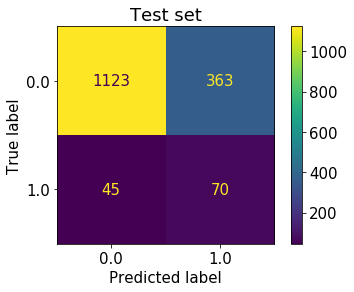

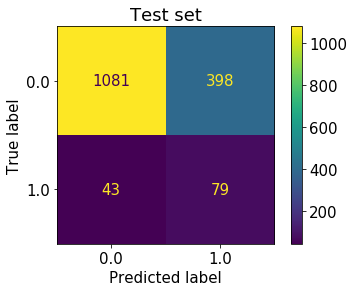

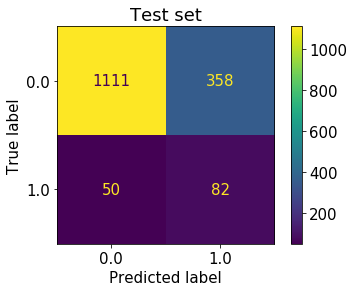

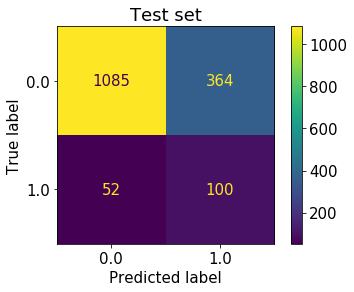

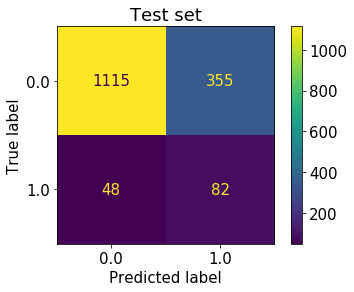

In [37]:
# surprising - precision got slightly worse than in Model 14 (recall 0.63, precision 0.19)

ut.k_fold_validator(X_training, y_training, logreg)

### Model 20: Complement naive bayes with race feature

Classifier: ComplementNB()
Cross-validation folds: 5


Train mean recall: 0.52 +/- 0.02
Train mean precision: 0.23 +/- 0.01
Train mean ROC-AUC: 0.68 +/- 0.01


Test mean recall: 0.52 +/- 0.04
Test mean precision: 0.23 +/- 0.03
Test mean ROC-AUC: 0.68 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.38700     5.38700
heart_fail_binary  4.93500     4.93500
chron_bronc_binary 4.77900     4.77900
taking_ins_binary  4.41900     4.41900
ever_had_COPD      4.28160     4.28160
heart_cond_binary  3.54220     3.54220
osteoarth_binary   3.34920     3.34920
asthma_binary      3.07830     3.07830
diabetes_binary    3.05220     3.05220
RIDRETH3_2.0       3.04830     3.04830
other_arth_binary  2.96340     2.96340
RIDRETH3_6.0       2.58670     2.58670
RIDRETH3_1.0       2.48310     2.48310
RIDRETH3_4.0       2.06210     2.06210
RIDRETH3_3.0       1.71660     1.71660
RIDAGEYR           1.46140     1.46140 

Confusion matrices for each fold test set: 



/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


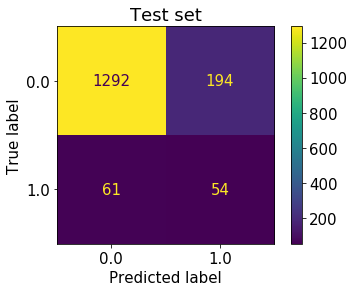

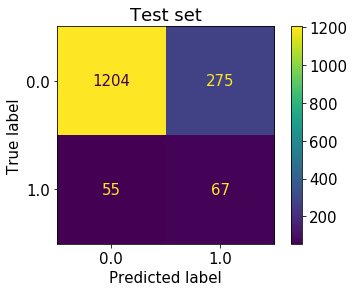

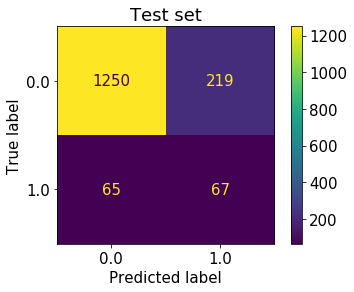

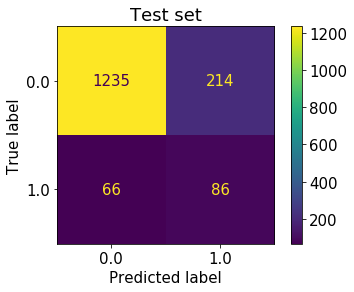

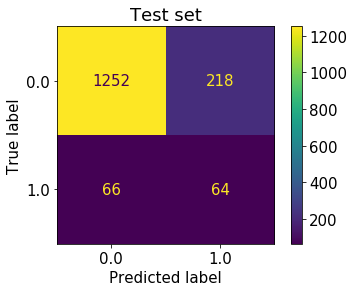

In [38]:
# recall much better

ut.k_fold_validator(X_training, y_training, CompNB)

### Model 21: Random Forest with race feature

Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Train mean recall: 0.65 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.7 +/- 0.0


Test mean recall: 0.63 +/- 0.03
Test mean precision: 0.19 +/- 0.03
Test mean ROC-AUC: 0.7 +/- 0.01


Feature weights: 
                     weight  abs_weight
RIDAGEYR           0.39010     0.39010
heart_cond_binary  0.22480     0.22480
osteoarth_binary   0.11270     0.11270
heart_fail_binary  0.06100     0.06100
diabetes_binary    0.05920     0.05920
ever_had_COPD      0.04770     0.04770
other_arth_binary  0.04090     0.04090
RIDRETH3_6.0       0.01310     0.01310
taking_ins_binary  0.00970     0.00970
RIDRETH3_3.0       0.00880     0.00880
emphysema_binary   0.00670     0.00670
chron_bronc_binary 0.00610     0.00610
RIDRETH3_1.0       0.00600     0.00600
asthma_binary      0.00540     0.00540
RIDRETH3_2.0       0.00520     0.00520
RIDRET

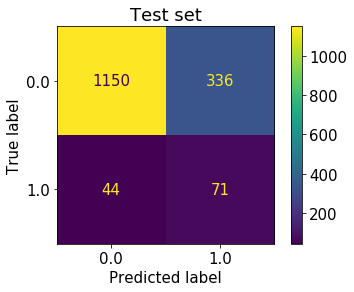

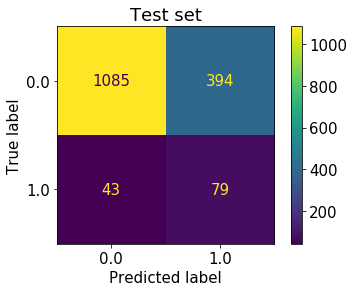

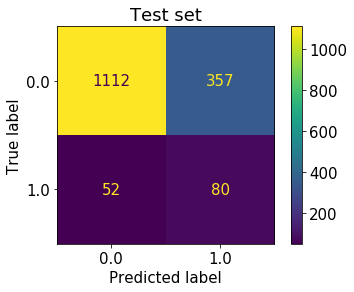

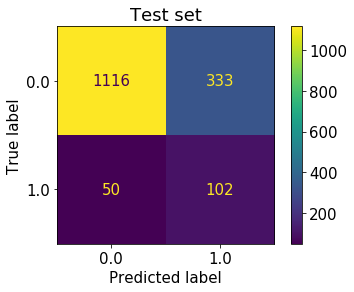

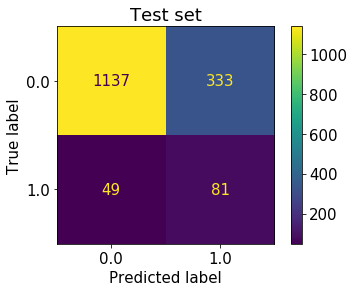

In [39]:
# recall slightly worse!

ut.k_fold_validator(X_training, y_training, forest, cv=5)

### Model 22: Logistic regression with prescription data

In [40]:
# add number of prescriptions per patient

binary_df_4 = pd.read_csv('data/binary_df_4').set_index('SEQN')
binary_df_4.head(200)

RIDAGEYR  osteoarth_binary  other_arth_binary  heart_fail_binary  \
SEQN                                                                            
93703.00000   2.00000           0.00000            0.00000            0.00000   
93704.00000   2.00000           0.00000            0.00000            0.00000   
93705.00000  66.00000           0.00000            1.00000            0.00000   
93706.00000  18.00000           0.00000            0.00000            0.00000   
93707.00000  13.00000           0.00000            0.00000            0.00000   
93708.00000  66.00000           0.00000            0.00000            0.00000   
93709.00000  75.00000           0.00000            1.00000            0.00000   
93711.00000  56.00000           0.00000            0.00000            0.00000   
93712.00000  18.00000           0.00000            0.00000            0.00000   
93713.00000  67.00000           0.00000            1.00000            0.00000   
93714.00000  54.00000           0.00000            0.00000            0.00000   
93715.00000  71.00000           1.00000            0.00000            0.00000   
93716.00000  61.00000           0.00000            1.00000            0.00000   
93717.00000  22.00000           0.00000            0.00000            0.00000   
93718.00000  45.00000           0.00000            0.00000            0.00000   
93719.00000  13.00000           0.00000            0.00000            0.00000   
93720.00000   1.00000           0.00000            0.00000            0.00000   
93721.00000  60.00000           0.00000            0.00000            0.00000   
93722.00000  60.00000           0.00000            0.00000            0.00000   
93723.00000  64.00000           1.00000            0.00000            0.00000   
93724.00000   5.00000           0.00000            0.00000            0.00000   
93725.00000   9.00000           0.00000            0.00000            0.00000   
93726.00000  67.00000           0.00000            0.00000            0.00000   
93727.00000  70.00000           0.00000            0.00000            0.00000   
93728.00000  53.00000           0.00000            0.00000            0.00000   
93729.00000  42.00000           0.00000            0.00000            0.00000   
93730.00000  57.00000           0.00000            0.00000            0.00000   
93731.00000  20.00000           0.00000            0.00000            0.00000   
93732.00000  72.00000           0.00000            0.00000            0.00000   
93733.00000  11.00000           0.00000            0.00000            0.00000   
93734.00000  13.00000           0.00000            0.00000            0.00000   
93735.00000  52.00000           0.00000            0.00000            0.00000   
93736.00000  11.00000           0.00000            0.00000            0.00000   
93737.00000   8.00000           0.00000            0.00000            0.00000   
93738.00000  26.00000           0.00000            0.00000            0.00000   
93739.00000   5.00000           0.00000            0.00000            0.00000   
93740.00000  72.00000           0.00000            1.00000            1.00000   
93741.00000   9.00000           0.00000            0.00000            0.00000   
93742.00000  72.00000           1.00000            0.00000            0.00000   
93743.00000  61.00000           0.00000            1.00000            0.00000   
93744.00000  10.00000           0.00000            0.00000            0.00000   
93745.00000   5.00000           0.00000            0.00000            0.00000   
93746.00000  25.00000           0.00000            0.00000            0.00000   
93747.00000  13.00000           0.00000            0.00000            0.00000   
93749.00000   1.00000           0.00000            0.00000            0.00000   
93750.00000  52.00000           0.00000            0.00000            0.00000   
93751.00000   7.00000           0.00000            0.00000            0.00000   
93752.00000  73.00000           0.00000     

In [41]:
# define X and y

X = binary_df_4.drop(columns = ['updated_hosp'])
y = binary_df_4['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)


Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Train mean recall: 0.65 +/- 0.01
Train mean precision: 0.2 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.0


Test mean recall: 0.64 +/- 0.03
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.7 +/- 0.01


Feature weights: 
                      weight  abs_weight
num_rx              1.87470     1.87470
RIDAGEYR            1.10960     1.10960
heart_cond_binary   0.83140     0.83140
heart_fail_binary   0.75800     0.75800
osteoarth_binary    0.72380     0.72380
RIDRETH3_6.0       -0.48470     0.48470
ever_had_COPD       0.35940     0.35940
other_arth_binary   0.31490     0.31490
emphysema_binary    0.25740     0.25740
RIDRETH3_1.0       -0.21560     0.21560
RIDRETH3_4.0       -0.16850     0.16850
RIDRETH3_2.0        0.14820     0.14820
chron_bronc_binary  0.11150     0.11150
RIDRETH3_3.0       -0.05240     0.05240
asthma_binary       0.04600     0.04600
diabetes_binary     0.03880     0.03880
taking_ins_bi

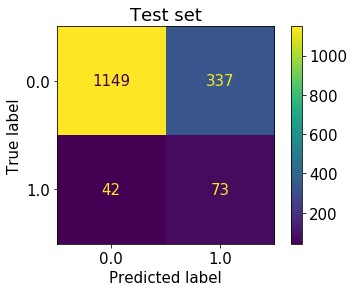

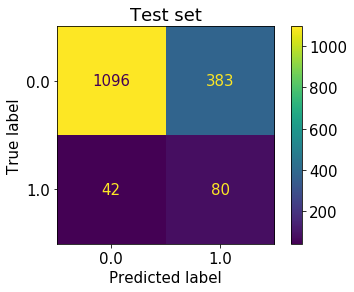

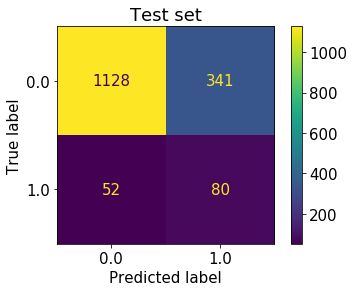

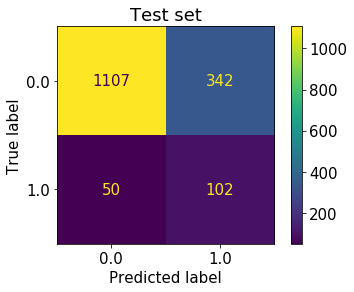

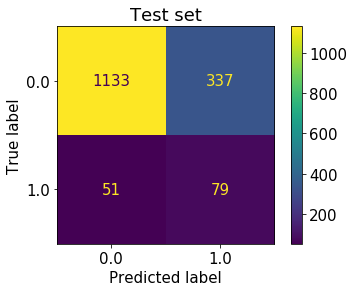

In [42]:
# recall and precision best yet for logistic regression

ut.k_fold_validator(X_training, y_training, logreg)

### Model 23: Complement Naive Bayes with prescription data

Classifier: ComplementNB()
Cross-validation folds: 5


Train mean recall: 0.54 +/- 0.01
Train mean precision: 0.23 +/- 0.01
Train mean ROC-AUC: 0.69 +/- 0.01


Test mean recall: 0.53 +/- 0.04
Test mean precision: 0.23 +/- 0.03
Test mean ROC-AUC: 0.68 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.41750     5.41750
heart_fail_binary  4.96550     4.96550
chron_bronc_binary 4.80950     4.80950
taking_ins_binary  4.44950     4.44950
ever_had_COPD      4.31210     4.31210
heart_cond_binary  3.57280     3.57280
num_rx             3.50360     3.50360
osteoarth_binary   3.37970     3.37970
asthma_binary      3.10880     3.10880
diabetes_binary    3.08280     3.08280
RIDRETH3_2.0       3.07880     3.07880
other_arth_binary  2.99400     2.99400
RIDRETH3_6.0       2.61720     2.61720
RIDRETH3_1.0       2.51360     2.51360
RIDRETH3_4.0       2.09260     2.09260
RIDRETH3_3.0       1.74720     1.74720
RIDAGEYR           1.49200     1.49200 

Confusion matri

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


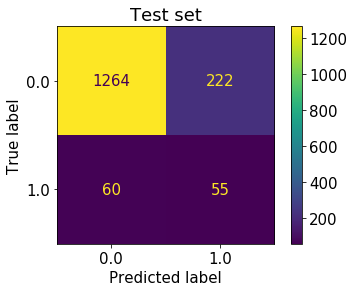

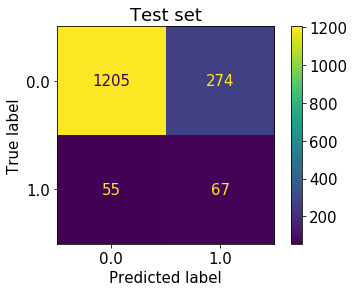

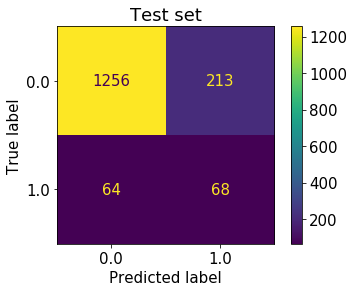

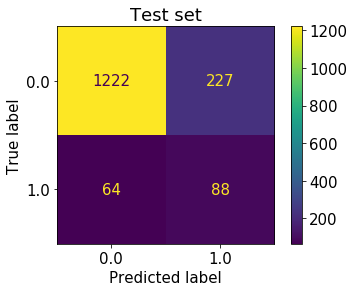

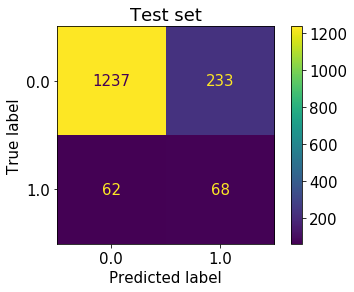

In [43]:
# recall slightly better

ut.k_fold_validator(X_training, y_training, CompNB)

### Model 24: Random Forest with prescription data

Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Train mean recall: 0.69 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.67 +/- 0.03
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.7 +/- 0.02


Feature weights: 
                     weight  abs_weight
num_rx             0.35350     0.35350
RIDAGEYR           0.27830     0.27830
heart_cond_binary  0.11370     0.11370
osteoarth_binary   0.07310     0.07310
heart_fail_binary  0.03800     0.03800
ever_had_COPD      0.03060     0.03060
diabetes_binary    0.03000     0.03000
other_arth_binary  0.02150     0.02150
RIDRETH3_6.0       0.01020     0.01020
taking_ins_binary  0.01010     0.01010
RIDRETH3_2.0       0.01010     0.01010
RIDRETH3_3.0       0.00780     0.00780
chron_bronc_binary 0.00660     0.00660
asthma_binary      0.00490     0.00490
emphysema_binary   0.00470     0.00470
RIDRE

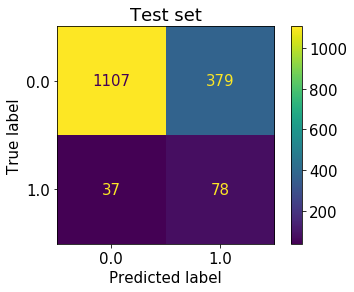

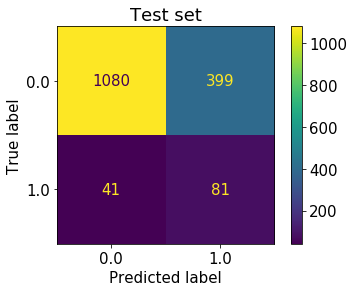

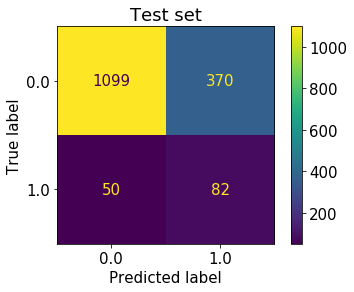

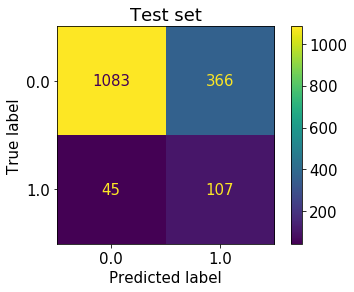

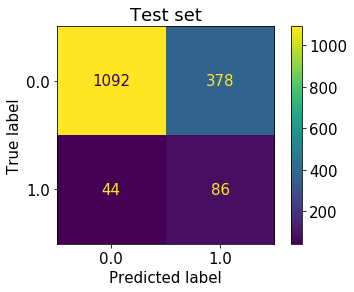

In [44]:
# recall way up, precision still below threshold

ut.k_fold_validator(X_training, y_training, forest, cv=5)

### Model 25: Logistic Regression with unknown prescription diagnosis data

In [45]:
binary_df_5 = pd.read_csv('data/binary_df_5').set_index('SEQN')
binary_df_5

RIDAGEYR  osteoarth_binary  other_arth_binary  \
SEQN                                                          
93703.00000    2.00000           0.00000            0.00000   
93704.00000    2.00000           0.00000            0.00000   
93705.00000   66.00000           0.00000            1.00000   
93706.00000   18.00000           0.00000            0.00000   
93707.00000   13.00000           0.00000            0.00000   
...                ...               ...                ...   
102952.00000  70.00000           0.00000            0.00000   
102953.00000  42.00000           0.00000            0.00000   
102954.00000  41.00000           0.00000            0.00000   
102955.00000  14.00000           0.00000            0.00000   
102956.00000  38.00000           1.00000            0.00000   

              heart_fail_binary  heart_cond_binary  ever_had_COPD  \
SEQN                                                                
93703.00000             0.00000            0.00000        0.00000   
93704.00000             0.00000            0.00000        0.00000   
93705.00000             0.00000            0.00000        0.00000   
93706.00000             0.00000            0.00000        0.00000   
93707.00000             0.00000            0.00000        0.00000   
...                         ...                ...            ...   
102952.00000            0.00000            0.00000        0.00000   
102953.00000            0.00000            0.00000        0.00000   
102954.00000            0.00000            0.00000        0.00000   
102955.00000            0.00000            0.00000        0.00000   
102956.00000            0.00000            0.00000        0.00000   

              emphysema_binary  chron_bronc_binary  asthma_binary  \
SEQN                                                                
93703.00000            0.00000             0.00000        0.00000   
93704.00000            0.00000             0.00000        0.00000   
93705.00000            0.00000             0.00000        0.00000   
93706.00000            0.00000             0.00000        0.00000   
93707.00000            0.00000             0.00000        0.00000   
...                        ...                 ...            ...   
102952.00000           0.00000             0.00000        0.00000   
102953.00000           0.00000             0.00000        0.00000   
102954.00000           0.00000             0.00000        0.00000   
102955.00000           0.00000             0.00000        0.00000   
102956.00000           0.00000             0.00000        0.00000   

              diabetes_binary  taking_ins_binary  updated_hosp  RIDRETH3_1.0  \
SEQN                                                                           
93703.00000           0.00000            0.00000       0.00000             0   
93704.00000           0.00000            0.00000       0.00000             0   
93705.00000           0.00000            0.00000       0.00000             0   
93706.00000           0.00000            0.00000       0.00000             0   
93707.00000           0.00000            0.00000       0.00000             0   
...                       ...                ...           ...           ...   
102952.00000          0.00000            0.00000       0.00000             0   
102953.00000          0.00000            0.00000       0.00000             1   
102954.00000          0.00000            0.00000       0.00000             0   
102955.00000          0.00000            0.00000       0.00000             0   
102956.00000          0.00000            0.00000       0.00000             0   

              RIDRETH3_2.0  RIDRETH3_3.0  RIDRETH3_4.0  RIDRETH3_6.0  num_rx  \
SEQN                                                                           
93703.00000              0             0             0             1 0.00000   
93704.00000              0             1             0             0 0.00000   
93705.00000              0           

In [46]:
# define X and y

X = binary_df_5.drop(columns = ['updated_hosp'])
y = binary_df_5['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)


Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Train mean recall: 0.64 +/- 0.0
Train mean precision: 0.2 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.0


Test mean recall: 0.64 +/- 0.02
Test mean precision: 0.2 +/- 0.02
Test mean ROC-AUC: 0.7 +/- 0.01


Feature weights: 
                      weight  abs_weight
num_rx              1.60820     1.60820
RIDAGEYR            1.08490     1.08490
heart_cond_binary   0.80500     0.80500
heart_fail_binary   0.77380     0.77380
osteoarth_binary    0.76590     0.76590
unknown_dx          0.68620     0.68620
RIDRETH3_6.0       -0.49400     0.49400
ever_had_COPD       0.34780     0.34780
other_arth_binary   0.33660     0.33660
emphysema_binary    0.30480     0.30480
RIDRETH3_1.0       -0.23300     0.23300
RIDRETH3_4.0       -0.19200     0.19200
RIDRETH3_2.0        0.13720     0.13720
chron_bronc_binary  0.09120     0.09120
RIDRETH3_3.0       -0.07820     0.07820
diabetes_binary     0.06970     0.06970
taking_ins_bina

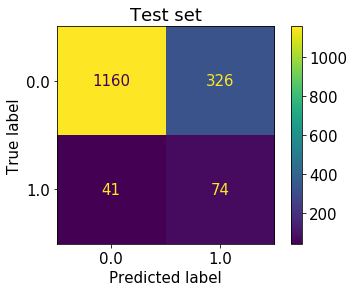

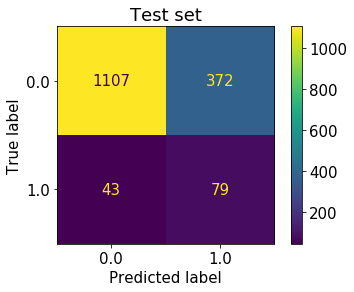

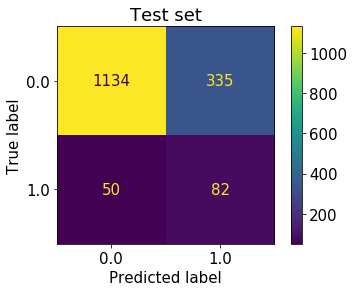

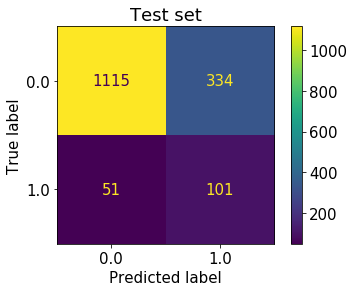

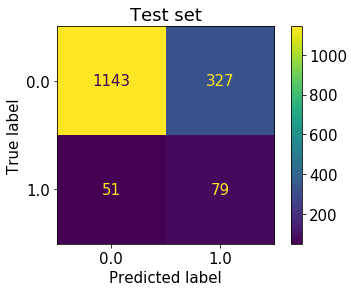

In [47]:
# recall and precision best yet - precision up to threshold!

ut.k_fold_validator(X_training, y_training, logreg)


### Model 26: Complement Naive Bayes with unknown prescription diagnosis data

Classifier: ComplementNB()
Cross-validation folds: 5


Train mean recall: 0.55 +/- 0.01
Train mean precision: 0.23 +/- 0.01
Train mean ROC-AUC: 0.69 +/- 0.01


Test mean recall: 0.54 +/- 0.04
Test mean precision: 0.23 +/- 0.03
Test mean ROC-AUC: 0.69 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.43040     5.43040
heart_fail_binary  4.97840     4.97840
chron_bronc_binary 4.82240     4.82240
taking_ins_binary  4.46240     4.46240
unknown_dx         4.35940     4.35940
ever_had_COPD      4.32500     4.32500
heart_cond_binary  3.58560     3.58560
num_rx             3.51640     3.51640
osteoarth_binary   3.39260     3.39260
asthma_binary      3.12170     3.12170
diabetes_binary    3.09570     3.09570
RIDRETH3_2.0       3.09170     3.09170
other_arth_binary  3.00680     3.00680
RIDRETH3_6.0       2.63010     2.63010
RIDRETH3_1.0       2.52650     2.52650
RIDRETH3_4.0       2.10550     2.10550
RIDRETH3_3.0       1.76000     1.76000
RIDAGEYR         

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


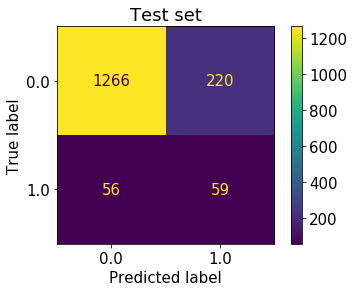

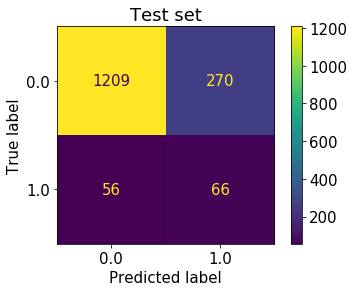

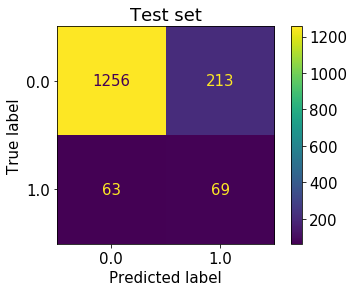

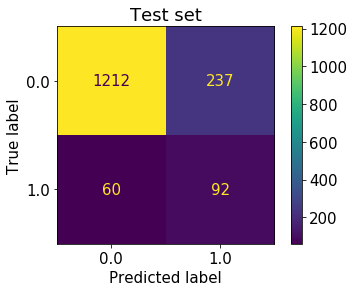

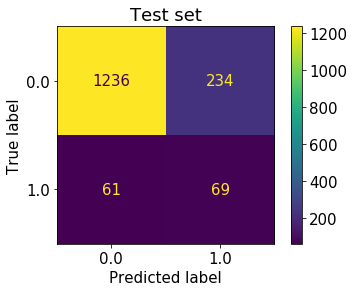

In [48]:
# recall up

ut.k_fold_validator(X_training, y_training, CompNB)


### Model 27: Random Forest with unknown prescription diagnosis data

Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Train mean recall: 0.69 +/- 0.01
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.67 +/- 0.01
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                     weight  abs_weight
num_rx             0.31520     0.31520
RIDAGEYR           0.24690     0.24690
heart_cond_binary  0.13750     0.13750
osteoarth_binary   0.10180     0.10180
heart_fail_binary  0.03650     0.03650
ever_had_COPD      0.03310     0.03310
unknown_dx         0.02790     0.02790
diabetes_binary    0.02730     0.02730
other_arth_binary  0.02510     0.02510
RIDRETH3_6.0       0.00930     0.00930
chron_bronc_binary 0.00770     0.00770
RIDRETH3_2.0       0.00690     0.00690
emphysema_binary   0.00550     0.00550
taking_ins_binary  0.00500     0.00500
RIDRETH3_3.0       0.00500     0.00500
asth

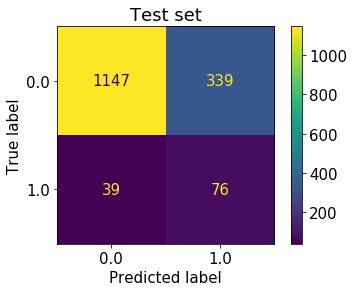

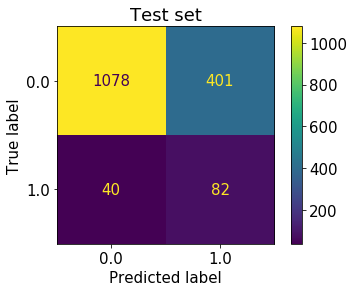

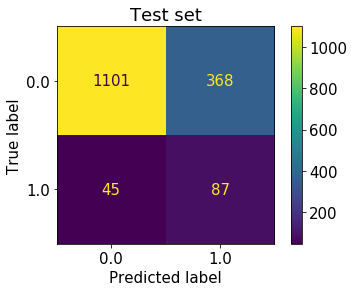

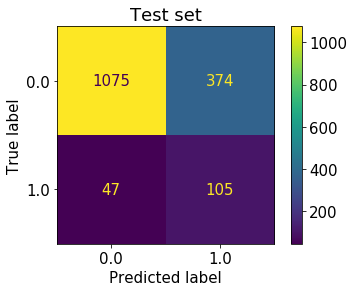

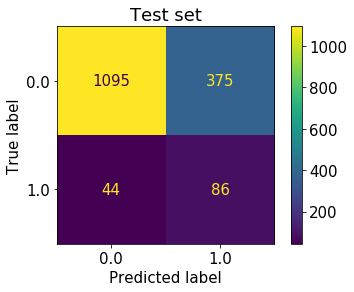

In [49]:
# recall up, precision still below threshold

ut.k_fold_validator(X_training, y_training, forest, cv=5)

### Model 27: Logistic regression with age buckets

In [50]:
# try age buckets instead of continuous age

binary_df_6 = pd.read_csv('data/binary_df_6').set_index('SEQN')
binary_df_6

osteoarth_binary  other_arth_binary  heart_fail_binary  \
SEQN                                                                   
93703.00000            0.00000            0.00000            0.00000   
93704.00000            0.00000            0.00000            0.00000   
93705.00000            0.00000            1.00000            0.00000   
93706.00000            0.00000            0.00000            0.00000   
93707.00000            0.00000            0.00000            0.00000   
...                        ...                ...                ...   
102952.00000           0.00000            0.00000            0.00000   
102953.00000           0.00000            0.00000            0.00000   
102954.00000           0.00000            0.00000            0.00000   
102955.00000           0.00000            0.00000            0.00000   
102956.00000           1.00000            0.00000            0.00000   

              heart_cond_binary  ever_had_COPD  emphysema_binary  \
SEQN                                                               
93703.00000             0.00000        0.00000           0.00000   
93704.00000             0.00000        0.00000           0.00000   
93705.00000             0.00000        0.00000           0.00000   
93706.00000             0.00000        0.00000           0.00000   
93707.00000             0.00000        0.00000           0.00000   
...                         ...            ...               ...   
102952.00000            0.00000        0.00000           0.00000   
102953.00000            0.00000        0.00000           0.00000   
102954.00000            0.00000        0.00000           0.00000   
102955.00000            0.00000        0.00000           0.00000   
102956.00000            0.00000        0.00000           0.00000   

              chron_bronc_binary  asthma_binary  diabetes_binary  \
SEQN                                                               
93703.00000              0.00000        0.00000          0.00000   
93704.00000              0.00000        0.00000          0.00000   
93705.00000              0.00000        0.00000          0.00000   
93706.00000              0.00000        0.00000          0.00000   
93707.00000              0.00000        0.00000          0.00000   
...                          ...            ...              ...   
102952.00000             0.00000        0.00000          0.00000   
102953.00000             0.00000        0.00000          0.00000   
102954.00000             0.00000        0.00000          0.00000   
102955.00000             0.00000        0.00000          0.00000   
102956.00000             0.00000        0.00000          0.00000   

              taking_ins_binary  updated_hosp  RIDRETH3_1.0  RIDRETH3_2.0  \
SEQN                                                                        
93703.00000             0.00000       0.00000             0             0   
93704.00000             0.00000       0.00000             0             0   
93705.00000             0.00000       0.00000             0             0   
93706.00000             0.00000       0.00000             0             0   
93707.00000             0.00000       0.00000             0             0   
...                         ...           ...           ...           ...   
102952.00000            0.00000       0.00000             0             0   
102953.00000            0.00000       0.00000             1             0   
102954.00000            0.00000       0.00000             0             0   
102955.00000            0.00000       0.00000             0             0   
102956.00000            0.00000       0.00000             0             0   

              RIDRETH3_3.0  RIDRETH3_4.0  RIDRETH3_6.0  num_rx  unknown_dx  \
SEQN                                                                         
93703.00000              0             0             1 0.00000     0.00000   
93704.00000              1             0             0 0.00000     0.00

In [51]:
# define X and y

X = binary_df_6.drop(columns = ['updated_hosp'])
y = binary_df_6['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)


Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Train mean recall: 0.65 +/- 0.01
Train mean precision: 0.21 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.63 +/- 0.03
Test mean precision: 0.21 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                      weight  abs_weight
num_rx              1.77690     1.77690
age_70+             1.24830     1.24830
age_50-59           0.88940     0.88940
osteoarth_binary    0.83670     0.83670
heart_cond_binary   0.83300     0.83300
age_18-49           0.77550     0.77550
heart_fail_binary   0.76040     0.76040
unknown_dx          0.66560     0.66560
age_60-69           0.59970     0.59970
RIDRETH3_6.0       -0.48420     0.48420
other_arth_binary   0.38760     0.38760
ever_had_COPD       0.36420     0.36420
emphysema_binary    0.29250     0.29250
age_0-5             0.25060     0.25060
RIDRETH3_1.0       -0.20330     0.20330
RIDRETH3_4.0       -0.16690     0.16690
RIDRETH3_2.

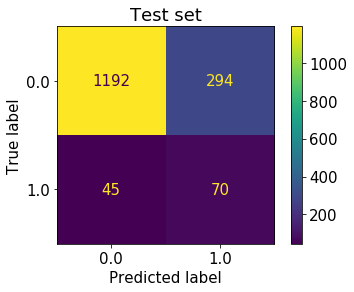

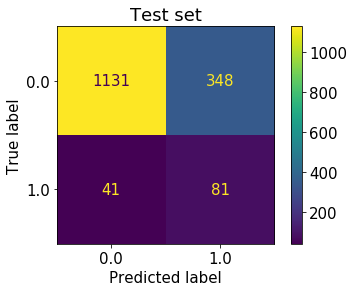

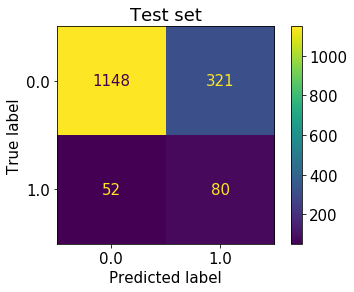

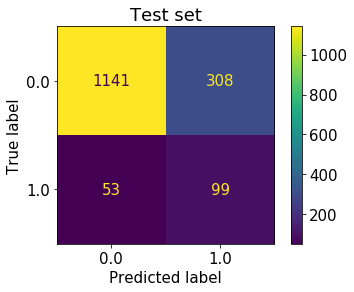

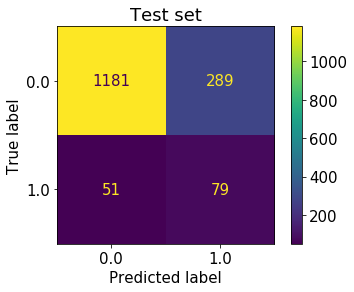

In [52]:
# recall slightly worse, precision slightly better
# race and age_buckets may not work well for logistic regression

ut.k_fold_validator(X_training, y_training, logreg)

### Complement Naive Bayes with age buckets

Classifier: ComplementNB()
Cross-validation folds: 5


Train mean recall: 0.61 +/- 0.01
Train mean precision: 0.22 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.0


Test mean recall: 0.6 +/- 0.05
Test mean precision: 0.22 +/- 0.03
Test mean ROC-AUC: 0.7 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.59410     5.59410
heart_fail_binary  5.14210     5.14210
chron_bronc_binary 4.98610     4.98610
taking_ins_binary  4.62610     4.62610
unknown_dx         4.52310     4.52310
ever_had_COPD      4.48870     4.48870
heart_cond_binary  3.74940     3.74940
num_rx             3.68020     3.68020
osteoarth_binary   3.55640     3.55640
asthma_binary      3.28540     3.28540
diabetes_binary    3.25940     3.25940
RIDRETH3_2.0       3.25550     3.25550
other_arth_binary  3.17060     3.17060
age_50-59          3.12120     3.12120
age_0-5            3.11430     3.11430
age_70+            3.11430     3.11430
age_60-69          2.91370     2.91370
RIDRETH3_6.0       2

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


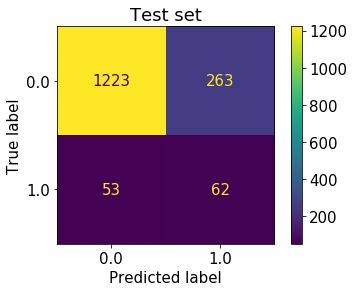

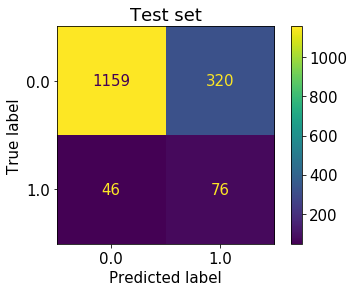

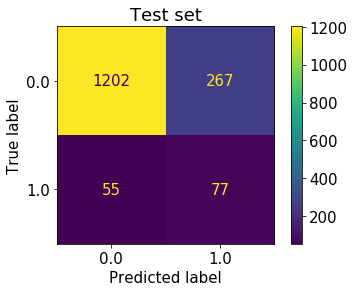

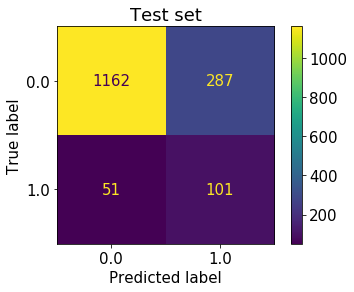

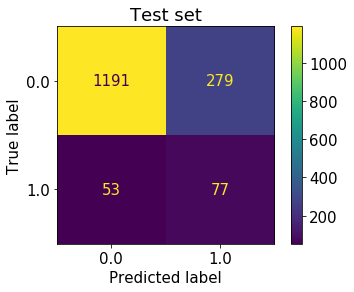

In [53]:
# recall way up

ut.k_fold_validator(X_training, y_training, CompNB)

### Random Forest with age buckets

Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Train mean recall: 0.69 +/- 0.02
Train mean precision: 0.19 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.67 +/- 0.03
Test mean precision: 0.19 +/- 0.01
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                     weight  abs_weight
num_rx             0.35020     0.35020
heart_cond_binary  0.16580     0.16580
age_70+            0.14170     0.14170
osteoarth_binary   0.09070     0.09070
heart_fail_binary  0.04610     0.04610
diabetes_binary    0.03920     0.03920
ever_had_COPD      0.03400     0.03400
other_arth_binary  0.03300     0.03300
unknown_dx         0.02520     0.02520
age_18-49          0.00940     0.00940
RIDRETH3_6.0       0.00890     0.00890
age_0-5            0.00860     0.00860
RIDRETH3_2.0       0.00670     0.00670
chron_bronc_binary 0.00610     0.00610
taking_ins_binary  0.00610     0.00610
age_

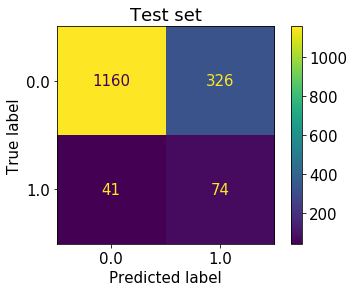

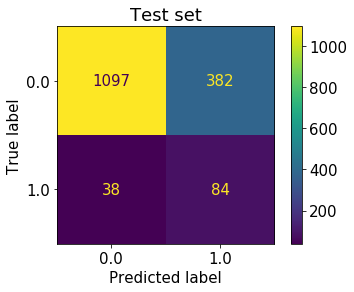

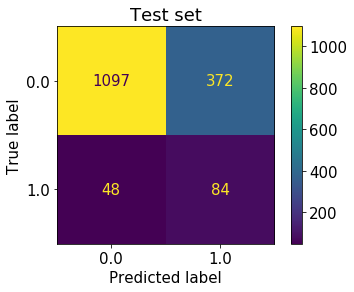

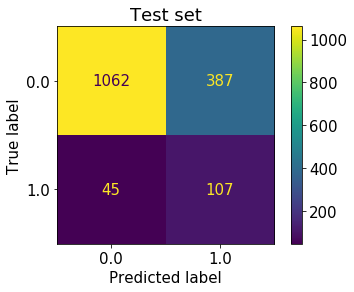

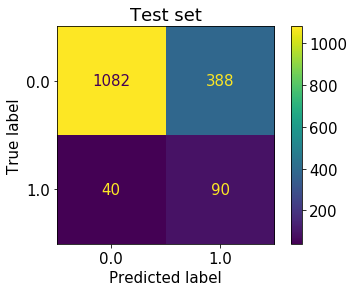

In [54]:
# recall slightly down, precision steady

ut.k_fold_validator(X_training, y_training, forest, cv=5)

### Logistic regression with liver condition

In [55]:
# add feature for current liver condition

binary_df_7 = pd.read_csv('data/binary_df_7').set_index('SEQN')
binary_df_7

osteoarth_binary  other_arth_binary  heart_fail_binary  \
SEQN                                                                   
93703.00000            0.00000            0.00000            0.00000   
93704.00000            0.00000            0.00000            0.00000   
93705.00000            0.00000            1.00000            0.00000   
93706.00000            0.00000            0.00000            0.00000   
93707.00000            0.00000            0.00000            0.00000   
...                        ...                ...                ...   
102952.00000           0.00000            0.00000            0.00000   
102953.00000           0.00000            0.00000            0.00000   
102954.00000           0.00000            0.00000            0.00000   
102955.00000           0.00000            0.00000            0.00000   
102956.00000           1.00000            0.00000            0.00000   

              heart_cond_binary  ever_had_COPD  emphysema_binary  \
SEQN                                                               
93703.00000             0.00000        0.00000           0.00000   
93704.00000             0.00000        0.00000           0.00000   
93705.00000             0.00000        0.00000           0.00000   
93706.00000             0.00000        0.00000           0.00000   
93707.00000             0.00000        0.00000           0.00000   
...                         ...            ...               ...   
102952.00000            0.00000        0.00000           0.00000   
102953.00000            0.00000        0.00000           0.00000   
102954.00000            0.00000        0.00000           0.00000   
102955.00000            0.00000        0.00000           0.00000   
102956.00000            0.00000        0.00000           0.00000   

              chron_bronc_binary  asthma_binary  diabetes_binary  \
SEQN                                                               
93703.00000              0.00000        0.00000          0.00000   
93704.00000              0.00000        0.00000          0.00000   
93705.00000              0.00000        0.00000          0.00000   
93706.00000              0.00000        0.00000          0.00000   
93707.00000              0.00000        0.00000          0.00000   
...                          ...            ...              ...   
102952.00000             0.00000        0.00000          0.00000   
102953.00000             0.00000        0.00000          0.00000   
102954.00000             0.00000        0.00000          0.00000   
102955.00000             0.00000        0.00000          0.00000   
102956.00000             0.00000        0.00000          0.00000   

              taking_ins_binary  updated_hosp  RIDRETH3_1.0  RIDRETH3_2.0  \
SEQN                                                                        
93703.00000             0.00000       0.00000             0             0   
93704.00000             0.00000       0.00000             0             0   
93705.00000             0.00000       0.00000             0             0   
93706.00000             0.00000       0.00000             0             0   
93707.00000             0.00000       0.00000             0             0   
...                         ...           ...           ...           ...   
102952.00000            0.00000       0.00000             0             0   
102953.00000            0.00000       0.00000             1             0   
102954.00000            0.00000       0.00000             0             0   
102955.00000            0.00000       0.00000             0             0   
102956.00000            0.00000       0.00000             0             0   

              RIDRETH3_3.0  RIDRETH3_4.0  RIDRETH3_6.0  num_rx  unknown_dx  \
SEQN                                                                         
93703.00000              0             0             1 0.00000     0.00000   
93704.00000              1             0             0 0.00000     0.00

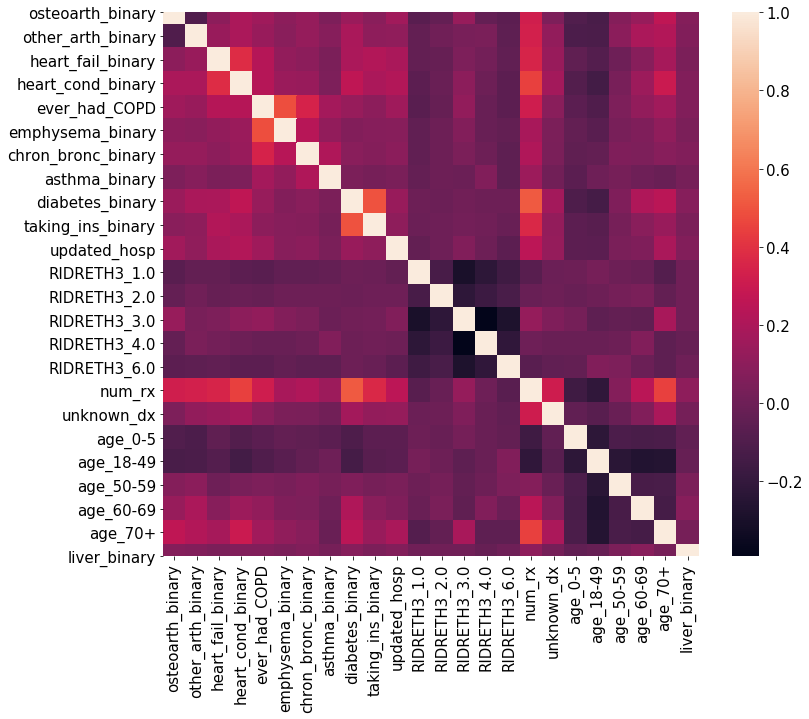

In [56]:
# recheck feature correlations since new features have been added

corr = binary_df_7.corr()

plt.figure(figsize = (12,10))
sns.heatmap(corr)

# number of rx is correlated with lots of conditions, but not more than 50%
# COPD and emphysema correlated about 50%

In [57]:
# define X and y

X = binary_df_7.drop(columns = ['updated_hosp'])
y = binary_df_7['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)



Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Train mean recall: 0.65 +/- 0.01
Train mean precision: 0.21 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.63 +/- 0.02
Test mean precision: 0.21 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                      weight  abs_weight
num_rx              1.77060     1.77060
age_70+             1.24870     1.24870
age_50-59           0.88970     0.88970
osteoarth_binary    0.83180     0.83180
heart_cond_binary   0.83090     0.83090
age_18-49           0.77450     0.77450
heart_fail_binary   0.76030     0.76030
unknown_dx          0.66560     0.66560
age_60-69           0.59790     0.59790
RIDRETH3_6.0       -0.48740     0.48740
other_arth_binary   0.38760     0.38760
ever_had_COPD       0.36490     0.36490
emphysema_binary    0.29440     0.29440
age_0-5             0.25030     0.25030
RIDRETH3_1.0       -0.20520     0.20520
RIDRETH3_4.0       -0.16770     0.16770
RIDRETH3_2.

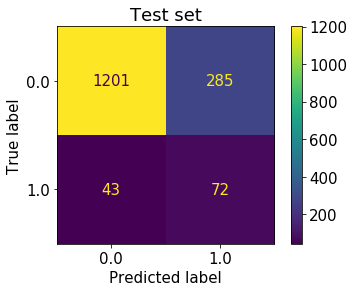

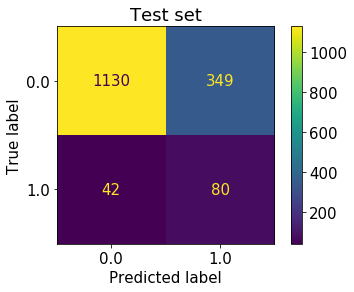

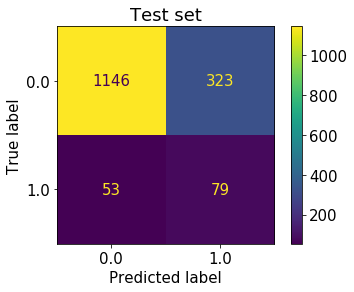

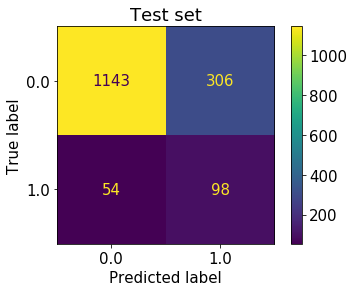

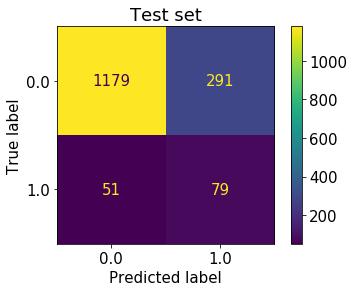

In [58]:
# no change from previous logistic regression model

logreg = LogisticRegression(class_weight='balanced')

ut.k_fold_validator(X_training, y_training, logreg)

### Complement Naive Bayes with Liver Condition

Classifier: ComplementNB()
Cross-validation folds: 5


Train mean recall: 0.61 +/- 0.01
Train mean precision: 0.22 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.01


Test mean recall: 0.6 +/- 0.04
Test mean precision: 0.21 +/- 0.03
Test mean ROC-AUC: 0.7 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.59970     5.59970
liver_binary       5.18750     5.18750
heart_fail_binary  5.14770     5.14770
chron_bronc_binary 4.99170     4.99170
taking_ins_binary  4.63170     4.63170
unknown_dx         4.52870     4.52870
ever_had_COPD      4.49430     4.49430
heart_cond_binary  3.75500     3.75500
num_rx             3.68580     3.68580
osteoarth_binary   3.56200     3.56200
asthma_binary      3.29100     3.29100
diabetes_binary    3.26500     3.26500
RIDRETH3_2.0       3.26110     3.26110
other_arth_binary  3.17620     3.17620
age_50-59          3.12680     3.12680
age_0-5            3.11990     3.11990
age_70+            3.11990     3.11990
age_60-69          

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


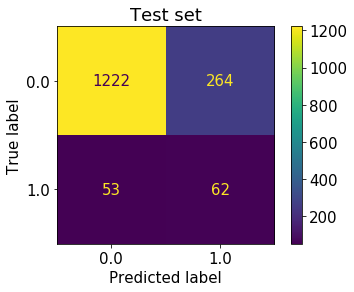

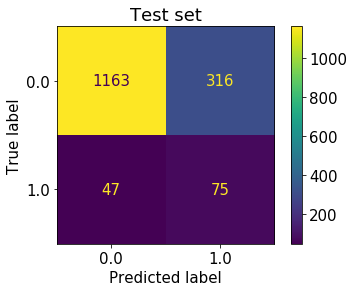

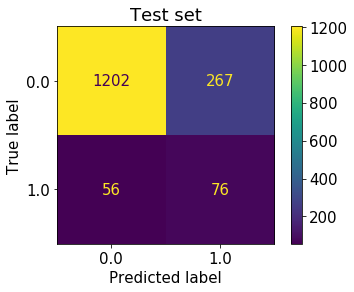

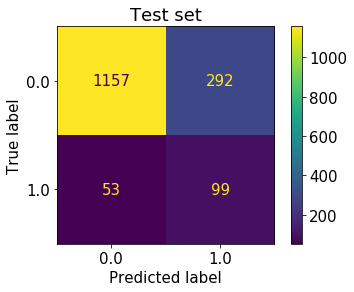

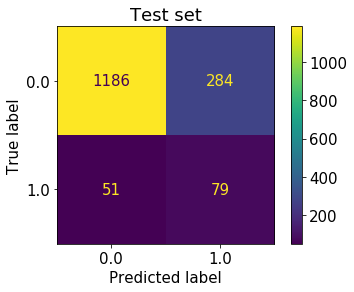

In [59]:
# recall steady, precision slightly down

CompNB = ComplementNB()

ut.k_fold_validator(X_training, y_training, CompNB)

### Random Forest with Liver Condition

Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Train mean recall: 0.69 +/- 0.02
Train mean precision: 0.2 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.67 +/- 0.03
Test mean precision: 0.19 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                     weight  abs_weight
num_rx             0.35420     0.35420
heart_cond_binary  0.14810     0.14810
age_70+            0.14350     0.14350
osteoarth_binary   0.09690     0.09690
heart_fail_binary  0.04580     0.04580
diabetes_binary    0.03790     0.03790
unknown_dx         0.03660     0.03660
other_arth_binary  0.03250     0.03250
ever_had_COPD      0.03080     0.03080
chron_bronc_binary 0.01080     0.01080
age_18-49          0.01040     0.01040
taking_ins_binary  0.00740     0.00740
RIDRETH3_6.0       0.00730     0.00730
age_50-59          0.00650     0.00650
RIDRETH3_2.0       0.00510     0.00510
emphy

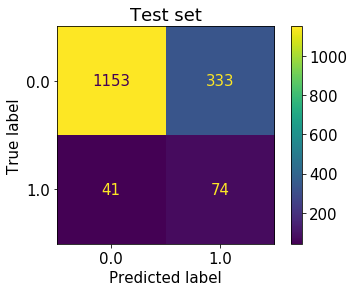

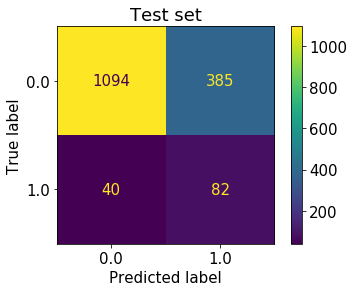

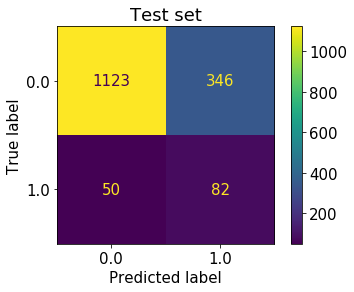

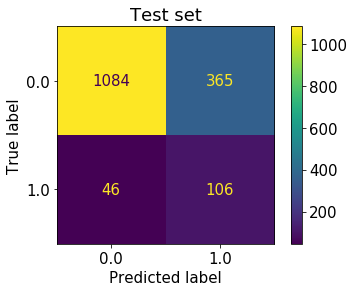

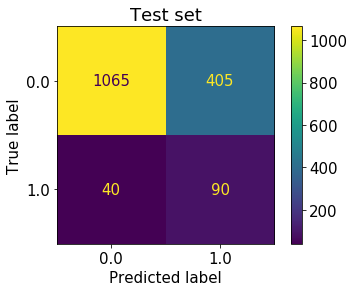

In [60]:
# recall up, precision steady
# maybe test without age buckets

ut.k_fold_validator(X_training, y_training, forest, cv=5)

In [61]:
# check how many ppl have current liver condition
binary_df_7['liver_binary'].value_counts()

# very few, but because it has a heavy weight/importance, let's keep it in for now

0    8760
1     134
Name: liver_binary, dtype: int64

## Add cancer diagnoses

In [62]:
binary_df_8 = pd.read_csv('data/binary_df_8').set_index('SEQN')
binary_df_8.head()

osteoarth_binary  other_arth_binary  heart_fail_binary  \
SEQN                                                                  
93703.00000           0.00000            0.00000            0.00000   
93704.00000           0.00000            0.00000            0.00000   
93705.00000           0.00000            1.00000            0.00000   
93706.00000           0.00000            0.00000            0.00000   
93707.00000           0.00000            0.00000            0.00000   

             heart_cond_binary  ever_had_COPD  emphysema_binary  \
SEQN                                                              
93703.00000            0.00000        0.00000           0.00000   
93704.00000            0.00000        0.00000           0.00000   
93705.00000            0.00000        0.00000           0.00000   
93706.00000            0.00000        0.00000           0.00000   
93707.00000            0.00000        0.00000           0.00000   

             chron_bronc_binary  asthma_binary  diabetes_binary  \
SEQN                                                              
93703.00000             0.00000        0.00000          0.00000   
93704.00000             0.00000        0.00000          0.00000   
93705.00000             0.00000        0.00000          0.00000   
93706.00000             0.00000        0.00000          0.00000   
93707.00000             0.00000        0.00000          0.00000   

             taking_ins_binary  updated_hosp  RIDRETH3_1.0  RIDRETH3_2.0  \
SEQN                                                                       
93703.00000            0.00000       0.00000             0             0   
93704.00000            0.00000       0.00000             0             0   
93705.00000            0.00000       0.00000             0             0   
93706.00000            0.00000       0.00000             0             0   
93707.00000            0.00000       0.00000             0             0   

             RIDRETH3_3.0  RIDRETH3_4.0  RIDRETH3_6.0  num_rx  unknown_dx  \
SEQN                                                                        
93703.00000             0             0             1 0.00000     0.00000   
93704.00000             1             0             0 0.00000     0.00000   
93705.00000             0             1             0 2.00000     0.00000   
93706.00000             0             0             1 0.00000     0.00000   
93707.00000             0             0             0 0.00000     0.00000   

             age_0-5  age_18-49  age_50-59  age_60-69  age_70+  liver_binary  \
SEQN                                                                           
93703.00000        1          0          0          0        0             0   
93704.00000        1          0          0          0        0             0   
93705.00000        0          0          0          1        0             0   
93706.00000        0          1          0          0        0             0   
93707.00000        0          0          0          0        0             0   

             recent_cancer  
SEQN                        
93703.00000              0  
93704.00000              0  
93705.00000              0  
93706.00000              0  
93707.00000              0

In [63]:
# try adding recent cancer dx

X = binary_df_8.drop(columns = ['updated_hosp'])
y = binary_df_8['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)



### Logistic Regression with cancer diagnoses

Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Train mean recall: 0.65 +/- 0.01
Train mean precision: 0.21 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.64 +/- 0.02
Test mean precision: 0.21 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                      weight  abs_weight
num_rx              1.71800     1.71800
age_70+             1.18570     1.18570
age_50-59           0.86320     0.86320
osteoarth_binary    0.85310     0.85310
heart_cond_binary   0.82380     0.82380
heart_fail_binary   0.77500     0.77500
age_18-49           0.76450     0.76450
unknown_dx          0.66960     0.66960
age_60-69           0.56090     0.56090
recent_cancer       0.51150     0.51150
RIDRETH3_6.0       -0.47450     0.47450
other_arth_binary   0.37750     0.37750
ever_had_COPD       0.36100     0.36100
emphysema_binary    0.27640     0.27640
age_0-5             0.25180     0.25180
RIDRETH3_1.0       -0.19770     0.19770
RIDRETH3_2.

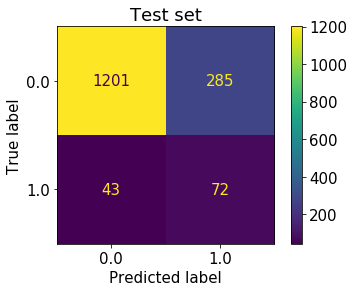

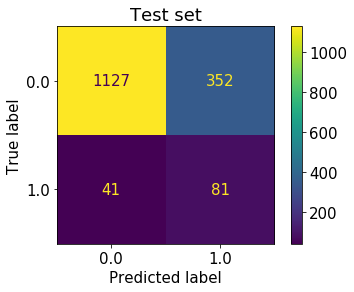

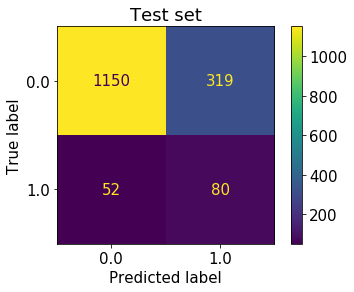

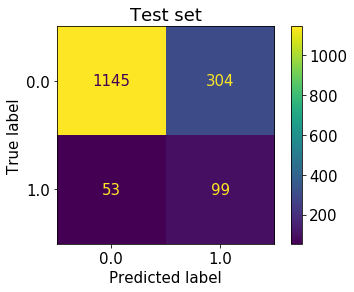

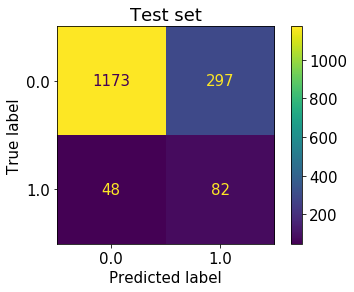

In [64]:
# recall slightly up from previous model

ut.k_fold_validator(X_training, y_training, logreg)

Classifier: LogisticRegression(class_weight='balanced')
Cross-validation folds: 5


Train mean recall: 0.64 +/- 0.0
Train mean precision: 0.21 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.63 +/- 0.02
Test mean precision: 0.21 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                      weight  abs_weight
num_rx              1.72390     1.72390
age_70+             1.10290     1.10290
osteoarth_binary    0.86120     0.86120
heart_cond_binary   0.82110     0.82110
age_50-59           0.77490     0.77490
heart_fail_binary   0.77200     0.77200
age_18-49           0.68360     0.68360
unknown_dx          0.67110     0.67110
recent_cancer       0.51280     0.51280
age_60-69           0.47400     0.47400
other_arth_binary   0.37880     0.37880
RIDRETH3_6.0       -0.36600     0.36600
ever_had_COPD       0.35730     0.35730
emphysema_binary    0.28210     0.28210
RIDRETH3_2.0        0.27320     0.27320
chron_bronc_binary  0.14670     0.14670
diabetes_bin

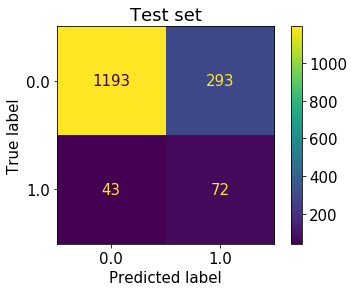

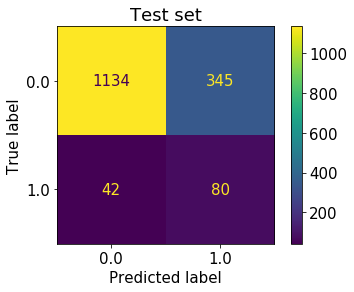

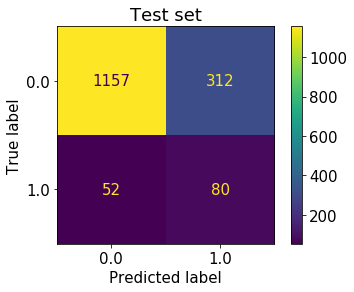

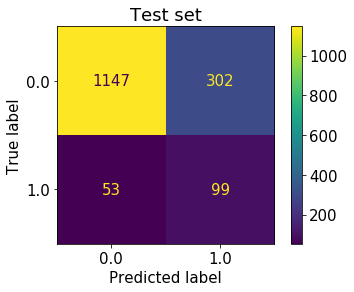

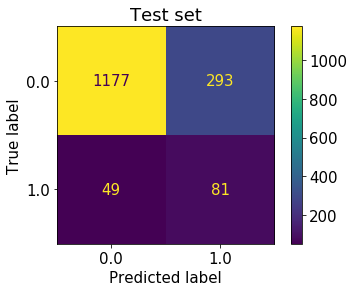

In [65]:
# try dropping age and race columns with lower weights
# slightly worse when dropped 'RIDRETH3_4.0'

X = binary_df_8.drop(columns = ['updated_hosp', 'age_0-5',  'RIDRETH3_3.0', 'RIDRETH3_4.0'])
y = binary_df_8['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)

ut.k_fold_validator(X_training, y_training, logreg)

### Complement Naive Bayes with cancer diagnoses

Classifier: ComplementNB()
Cross-validation folds: 5


Train mean recall: 0.61 +/- 0.01
Train mean precision: 0.22 +/- 0.01
Train mean ROC-AUC: 0.71 +/- 0.0


Test mean recall: 0.6 +/- 0.05
Test mean precision: 0.21 +/- 0.03
Test mean ROC-AUC: 0.7 +/- 0.02


Feature weights: 
                     weight  abs_weight
emphysema_binary   5.61250     5.61250
liver_binary       5.20020     5.20020
heart_fail_binary  5.16050     5.16050
chron_bronc_binary 5.00450     5.00450
taking_ins_binary  4.64450     4.64450
unknown_dx         4.54140     4.54140
ever_had_COPD      4.50710     4.50710
recent_cancer      4.36850     4.36850
heart_cond_binary  3.76770     3.76770
num_rx             3.69850     3.69850
osteoarth_binary   3.57470     3.57470
asthma_binary      3.30380     3.30380
diabetes_binary    3.27780     3.27780
RIDRETH3_2.0       3.27380     3.27380
other_arth_binary  3.18890     3.18890
age_50-59          3.13950     3.13950
age_0-5            3.13270     3.13270
age_70+            3

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


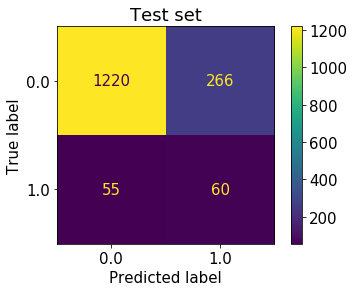

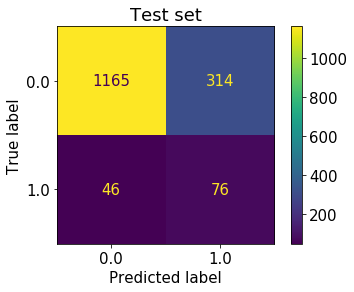

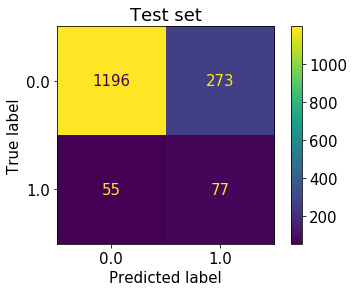

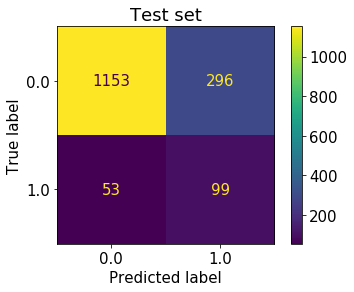

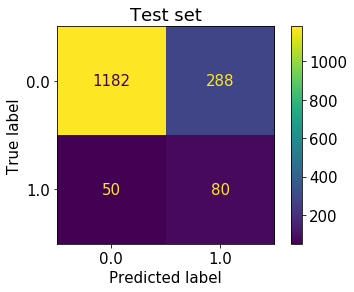

In [66]:
# recall slightly worse than 2 models ago

X = binary_df_8.drop(columns = ['updated_hosp'])
y = binary_df_8['updated_hosp']

# create holdout set

X_training, X_holdout, y_training, y_holdout = train_test_split(X, y, test_size=0.1, random_state=807)

ut.k_fold_validator(X_training, y_training, CompNB)

### Random forest with cancer diagnoses

Classifier: RandomForestClassifier(class_weight='balanced', max_depth=6,
                       min_samples_split=300)
Cross-validation folds: 5


Train mean recall: 0.69 +/- 0.02
Train mean precision: 0.2 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.67 +/- 0.03
Test mean precision: 0.19 +/- 0.01
Test mean ROC-AUC: 0.71 +/- 0.01


Feature weights: 
                     weight  abs_weight
num_rx             0.32250     0.32250
heart_cond_binary  0.16720     0.16720
age_70+            0.13080     0.13080
osteoarth_binary   0.09660     0.09660
other_arth_binary  0.04250     0.04250
diabetes_binary    0.03950     0.03950
unknown_dx         0.03750     0.03750
heart_fail_binary  0.03530     0.03530
ever_had_COPD      0.03220     0.03220
recent_cancer      0.01810     0.01810
taking_ins_binary  0.00930     0.00930
age_18-49          0.00920     0.00920
chron_bronc_binary 0.00900     0.00900
RIDRETH3_2.0       0.00810     0.00810
emphysema_binary   0.00780     0.00780
RIDRE

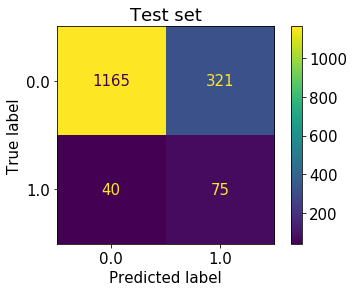

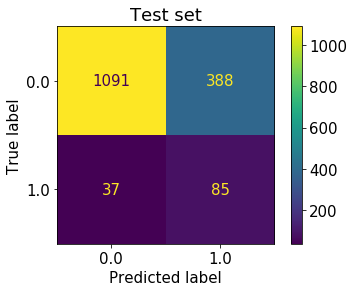

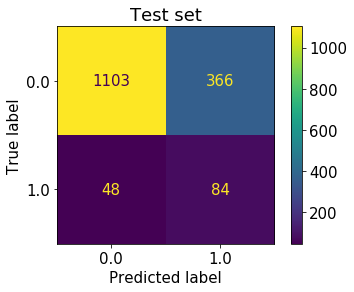

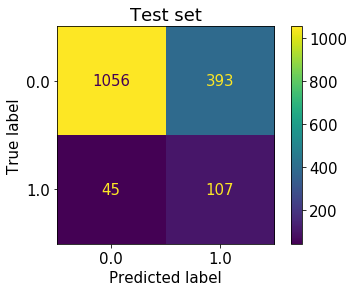

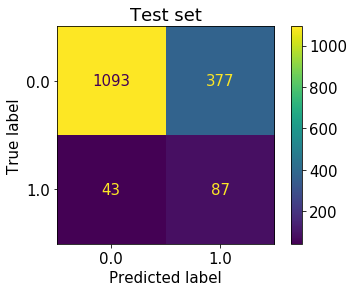

In [67]:
# recall down, precision steady

ut.k_fold_validator(X_training, y_training, forest, cv=5)

### Adaptive boosted trees with cancer diagnoses

Classifier: AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         max_features=7,
                                                         max_leaf_nodes=25,
                                                         min_samples_leaf=200,
                                                         min_samples_split=1000),
                   n_estimators=100)
Cross-validation folds: 5


Train mean recall: 0.68 +/- 0.01
Train mean precision: 0.2 +/- 0.01
Train mean ROC-AUC: 0.72 +/- 0.0


Test mean recall: 0.65 +/- 0.03
Test mean precision: 0.2 +/- 0.02
Test mean ROC-AUC: 0.71 +/- 0.01




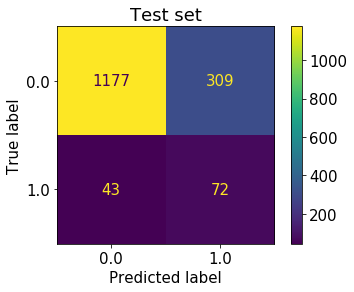

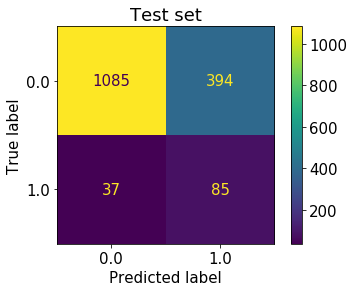

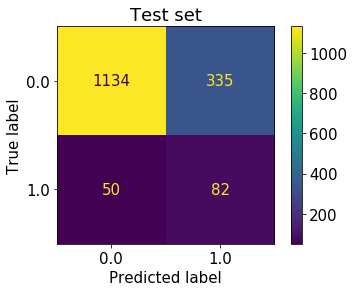

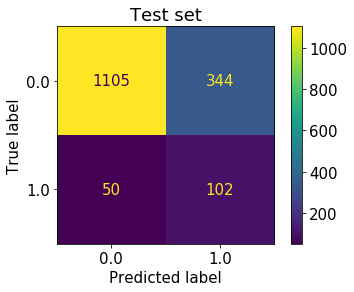

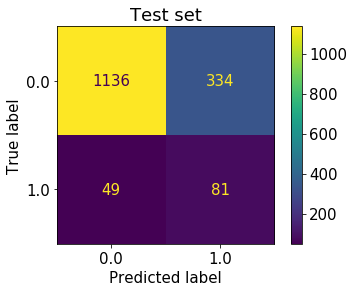

In [68]:
# recall worse than random forest

Ada = AdaBoostClassifier(base_estimator=tree, n_estimators=100)

ut.k_fold_validator(X_training, y_training, Ada)

## Test Final Model on Holdout Set

Train recall score: 0.65
Train precision score: 0.21
Train ROC-AUC score: 0.72


Holdout recall score: 0.69
Holdout precision score: 0.21
Holdout ROC-AUC score: 0.74




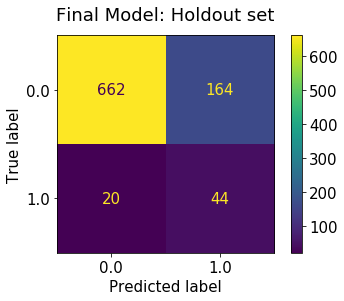

In [69]:
# chose Logistic Regression as final model since its recall score is better than Complement Naive Bayes
# and its precision score is above 0.2 threshold, which is not true for Random Forest
# recall score on holdout set is surprisingly high - 0.69
# when run on the holdout set, the results indicate overfitting, suggesting that such a high recall score may
# not be generalizable for all data - probably closer to 0.64 as in testing

logreg.fit(X_training, y_training)

y_pred_train = logreg.predict(X_training)
y_pred_holdout = logreg.predict(X_holdout)

print('Train recall score:', round(recall_score(y_training, y_pred_train), 2))
print('Train precision score:', round(precision_score(y_training, y_pred_train), 2)) 
print('Train ROC-AUC score:', round(roc_auc_score(y_training, y_pred_train), 2)) 
print('\n')
print('Holdout recall score:', round(recall_score(y_holdout, y_pred_holdout), 2))
print('Holdout precision score:', round(precision_score(y_holdout, y_pred_holdout), 2))  
print('Holdout ROC-AUC score:', round(roc_auc_score(y_holdout, y_pred_holdout), 2)) 
print('\n')

plot_confusion_matrix(logreg, X_holdout, y_holdout)
plt.title('Final Model: Holdout set', fontsize=18, pad=15);
# plt.savefig('images/final-model-holdout')

In [71]:
# explore feature weights of final model

ut.order_features(logreg.coef_, X_training)

weight  abs_weight
age_70+             1.20580     1.20580
age_50-59           0.95550     0.95550
heart_cond_binary   0.75810     0.75810
osteoarth_binary    0.71450     0.71450
age_18-49           0.69000     0.69000
heart_fail_binary   0.68000     0.68000
unknown_dx          0.67490     0.67490
RIDRETH3_6.0       -0.61930     0.61930
recent_cancer       0.60670     0.60670
age_60-69           0.59490     0.59490
liver_binary        0.45950     0.45950
ever_had_COPD       0.39090     0.39090
age_0-5             0.37390     0.37390
other_arth_binary   0.34530     0.34530
RIDRETH3_1.0       -0.22260     0.22260
chron_bronc_binary  0.21700     0.21700
diabetes_binary     0.17870     0.17870
emphysema_binary    0.16970     0.16970
RIDRETH3_4.0       -0.16460     0.16460
RIDRETH3_3.0       -0.11470     0.11470
num_rx              0.08880     0.08880
asthma_binary       0.05670     0.05670
RIDRETH3_2.0        0.05230     0.05230
taking_ins_binary  -0.01560     0.01560

## Conclusions
Identifying hospitalized NHANES participants was a challenging problem since they comprised just 8.5% of all participants, and because some hospitalizations are due to random accidents rather than prior medical conditions. The final model provides value to ACOs by correctly predicting 69% of hospitalized patients, while keeping false positives (people whom the model predicted would be hospitalized but were not) to less than 80% of all predicted positives.

The model's precision score was 0.21, meaning that 21 out of every hundred participants returned by the model were truly hospitalized.  The model's 69% recall rate means that most hospitalized participants would be captured by the model. Since each avoided hospitalization is a step toward savings for ACOs, ACOs seek to identify as many high-risk patients as possible.

The final model improved on the baseline model, which identified only 2% of hospitalized participants, though about 45% of the participants it flagged were truly hospitalized.

## Further Investigation
Although the Logistic Regression model had a better precision score than the Random Forest model and thus was selected as the final model, the Random Forest had a better recall score.  Its precision score did not quite meet the 0.2 threshold, but if it had, the Random Forest would have been the best performing model.  It is possible that with better hyperparameter tuning, a Random Forest would perform better. 

It also seemed that the affect of age buckets rather than a continuous age variable was helpful to the Naive Bayes model but perhaps detrimental to the Logistic Regression and Random Forest models.  A next step would be to test the final model with an altered DataFrame containing a continuous age column.